# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

**Importing important libraries**

In [1]:
#Numerical Operations
import pandas as pd
import numpy as np

#Data Visualizattion
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 400)
np.set_printoptions(suppress=True)
%matplotlib inline



### Data Preparation and Understanding

Here we are going to load the dataset and get some important insight related to the dataset

In [2]:
#Loading the train and test data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#Dropping the Id column
df_train.set_index('id',drop=True,inplace=True)
df_test.set_index('id',drop=True,inplace=True)

df_train.head()


circle_id       loc_og_t2o_mou       std_og_t2o_mou       loc_ic_t2o_mou  \
id                                                                             
0         109                 0.00                 0.00                 0.00   
1         109                 0.00                 0.00                 0.00   
2         109                 0.00                 0.00                 0.00   
3         109                 0.00                 0.00                 0.00   
4         109                 0.00                 0.00                 0.00   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
id                                                                  
0             6/30/2014            7/31/2014            8/31/2014   
1             6/30/2014            7/31/2014            8/31/2014   
2             6/30/2014            7/31/2014            8/31/2014   
3             6/30/2014            7/31/2014            8/31/2014   
4             6/30/2014            7/31/2014            8/31/2014   

                 arpu_6               arpu_7               arpu_8  \
id                                                                  
0                 31.28                87.01                 7.53   
1                  0.00               122.79                42.95   
2                 60.81               103.18                 0.00   
3                156.36               205.26               111.09   
4                240.71               128.19               101.56   

            onnet_mou_6          onnet_mou_7          onnet_mou_8  \
id                                                                  
0                 48.58               124.38                 1.29   
1                  0.00                 0.00                 0.00   
2                  0.53                15.93                 0.00   
3                  7.26                16.01                 0.00   
4                 21.28                 4.83                 6.13   

           offnet_mou_6         offnet_mou_7         offnet_mou_8  \
id                                                                  
0                 32.24                96.68                 2.33   
1                  0.00                25.99                30.89   
2                 53.99                82.05                 0.00   
3                 68.76                78.48                50.23   
4                 56.99                38.11                 9.63   

          roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
id                                                                  
0                  0.00                 0.00                 0.00   
1                  0.00                 0.00                 0.00   
2                  0.00                 0.00                 0.00   
3                  0.00                 0.00                 0.00   
4                 53.64                 0.00                 0.00   

          roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
id                                                                  
0                  0.00                 0.00                 0.00   
1                  0.00                 0.00                 0.00   
2                  0.00                 0.00                 0.00   
3                  0.00                 0.00                 1.63   
4                 15.73                 0.00                 0.00   

       loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
id                                                                  
0                  2.23                 0.00                 0.28   
1                  0.00                 0.00                 0.00   
2                  0.53                12.98                 0.00   
3                  6.99                 3.94                 0.00   
4                 10.16                 4.83                 6.13   

       loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og

**Checking the Target variable**

There is huge chance being our model being biased, the distribution is not equally distributed

In [3]:
df_train.churn_probability.value_counts() / df_train.shape[0] * 100
# too biased
# need to balance weight 

0                  89.81
1                  10.19
Name: churn_probability, dtype: float64

In [4]:
df_test.head()

circle_id       loc_og_t2o_mou       std_og_t2o_mou  \
id                                                           
69999        109                 0.00                 0.00   
70000        109                 0.00                 0.00   
70001        109                 0.00                 0.00   
70002        109                 0.00                 0.00   
70003        109                 0.00                 0.00   

            loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
id                                                                     
69999                 0.00            6/30/2014            7/31/2014   
70000                 0.00            6/30/2014            7/31/2014   
70001                 0.00            6/30/2014            7/31/2014   
70002                 0.00            6/30/2014            7/31/2014   
70003                 0.00            6/30/2014            7/31/2014   

      last_date_of_month_8               arpu_6               arpu_7  \
id                                                                     
69999            8/31/2014                91.88                65.33   
70000            8/31/2014               414.17               515.57   
70001            8/31/2014               329.84               434.88   
70002            8/31/2014                43.55               171.39   
70003            8/31/2014               306.85               406.29   

                    arpu_8          onnet_mou_6          onnet_mou_7  \
id                                                                     
69999                64.44                31.78                20.23   
70000               360.87                75.51                41.21   
70001               746.24                 7.54                 7.86   
70002                24.40                 5.31                 2.16   
70003               413.33               450.93               609.03   

               onnet_mou_8         offnet_mou_6         offnet_mou_7  \
id                                                                     
69999                23.11                60.16                32.16   
70000                19.84               474.34               621.84   
70001                 8.40                16.98                45.81   
70002                 0.00                40.04               205.01   
70003               700.68                60.94                23.84   

              offnet_mou_8        roam_ic_mou_6        roam_ic_mou_7  \
id                                                                     
69999                34.83                 0.00                 0.00   
70000               394.94                 0.00                 0.00   
70001                45.04                22.81               103.38   
70002                24.01                 0.00                 0.00   
70003                74.16                 0.00                 0.00   

             roam_ic_mou_8        roam_og_mou_6        roam_og_mou_7  \
id                                                                     
69999                 0.00                 0.00                 0.00   
70000                 0.00                 0.00                 0.00   
70001                26.08                24.53                53.68   
70002                 0.00                 0.00                 0.00   
70003                 0.00                 0.00                 0.00   

             roam_og_mou_8     loc_og_t2t_mou_6     loc_og_t2t_mou_7  \
id                                                                     
69999                 0.00                24.88                20.23   
70000                 0.00                75.51                41.21   
70001                54.44                 0.00                 0.00   
70002                 0.00                 5.31                 0.00   
70003                 0.00                 0.45                 0.78   

          loc_og_t2t_mou_8     loc_og

In [5]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    arpu_6                    float64
 8    arpu_7                    float64
 9    arpu_8                    float64
 10   onnet_mou_6               float64
 11   onnet_mou_7               float64
 12   onnet_mou_8               float64
 13   offnet_mou_6              float64
 14   offnet_mou_7              float64
 15   offnet_mou_8              float64
 16   roam_ic_mou_6             float64
 17   roam_ic_mou_7             float64
 18   roam_ic_mou_8             float64
 19   roam_og_mou_6             float64
 20   roam

In [6]:
df_train.describe().transpose()

count                 mean  \
circle_id                     69,999.00               109.00   
loc_og_t2o_mou                69,297.00                 0.00   
std_og_t2o_mou                69,297.00                 0.00   
loc_ic_t2o_mou                69,297.00                 0.00   
arpu_6                        69,999.00               283.13   
arpu_7                        69,999.00               278.19   
arpu_8                        69,999.00               278.86   
onnet_mou_6                   67,231.00               133.15   
onnet_mou_7                   67,312.00               133.89   
onnet_mou_8                   66,296.00               132.98   
offnet_mou_6                  67,231.00               198.87   
offnet_mou_7                  67,312.00               197.15   
offnet_mou_8                  66,296.00               196.54   
roam_ic_mou_6                 67,231.00                 9.77   
roam_ic_mou_7                 67,312.00                 7.01   
roam_ic_mou_8                 66,296.00                 7.00   
roam_og_mou_6                 67,231.00                14.19   
roam_og_mou_7                 67,312.00                 9.84   
roam_og_mou_8                 66,296.00                 9.77   
loc_og_t2t_mou_6              67,231.00                46.90   
loc_og_t2t_mou_7              67,312.00                46.17   
loc_og_t2t_mou_8              66,296.00                45.69   
loc_og_t2m_mou_6              67,231.00                93.24   
loc_og_t2m_mou_7              67,312.00                90.80   
loc_og_t2m_mou_8              66,296.00                91.12   
loc_og_t2f_mou_6              67,231.00                 3.74   
loc_og_t2f_mou_7              67,312.00                 3.78   
loc_og_t2f_mou_8              66,296.00                 3.66   
loc_og_t2c_mou_6              67,231.00                 1.13   
loc_og_t2c_mou_7              67,312.00                 1.36   
loc_og_t2c_mou_8              66,296.00                 1.42   
loc_og_mou_6                  67,231.00               143.89   
loc_og_mou_7                  67,312.00               140.75   
loc_og_mou_8                  66,296.00               140.48   
std_og_t2t_mou_6              67,231.00                80.62   
std_og_t2t_mou_7              67,312.00                83.78   
std_og_t2t_mou_8              66,296.00                83.47   
std_og_t2m_mou_6              67,231.00                88.15   
std_og_t2m_mou_7              67,312.00                91.54   
std_og_t2m_mou_8              66,296.00                90.59   
std_og_t2f_mou_6              67,231.00                 1.13   
std_og_t2f_mou_7              67,312.00                 1.08   
std_og_t2f_mou_8              66,296.00                 1.06   
std_og_t2c_mou_6              67,231.00                 0.00   
std_og_t2c_mou_7              67,312.00                 0.00   
std_og_t2c_mou_8              66,296.00                 0.00   
std_og_mou_6                  67,231.00               169.90   
std_og_mou_7                  67,312.00               176.40   
std_og_mou_8                  66,296.00               175.12   
isd_og_mou_6                  67,231.00                 0.85   
isd_og_mou_7                  67,312.00                 0.81   
isd_og_mou_8                  66,296.00                 0.84   
spl_og_mou_6                  67,231.00                 3.96   
spl_og_mou_7                  67,312.00                 4.98   
spl_og_mou_8                  66,296.00                 5.05   
og_others_6                   67,231.00                 0.46   
og_others_7                   67,312.00                 0.02   
og_others_8                   66,296.00                 0.03   
total_og_mou_6                69,999.00               306.45   
total_og_mou_7                69,999.00               310.57   
total_og_mou_8                69,999.00               304.51   
loc_ic_t2t_mou_6              67,231.00                48.04   
lo

### Data Cleaning

This is most crucial and most time consuming steps in Model building

Here we are going to handle missing values and dropping unwanted columns

In [7]:
def updateCol(df):
    col_to_drop = df.var()[df.var() == 0].index
    df.drop(col_to_drop, inplace=True, axis=1)
    df.shape
    df.drop(columns=['last_date_of_month_6',
                     'last_date_of_month_7',
                     'last_date_of_month_8',
                     'fb_user_6',
                     'fb_user_7', 
                     'fb_user_8', ], inplace=True) 
    print(df.shape)            
updateCol(df_train)
updateCol(df_test)

(69999, 155)
(30000, 154)


In [8]:
df_train.isnull().sum() / df_train.shape[0] * 100

arpu_6                                     0.00
arpu_7                                     0.00
arpu_8                                     0.00
onnet_mou_6                                3.95
onnet_mou_7                                3.84
onnet_mou_8                                5.29
offnet_mou_6                               3.95
offnet_mou_7                               3.84
offnet_mou_8                               5.29
roam_ic_mou_6                              3.95
roam_ic_mou_7                              3.84
roam_ic_mou_8                              5.29
roam_og_mou_6                              3.95
roam_og_mou_7                              3.84
roam_og_mou_8                              5.29
loc_og_t2t_mou_6                           3.95
loc_og_t2t_mou_7                           3.84
loc_og_t2t_mou_8                           5.29
loc_og_t2m_mou_6                           3.95
loc_og_t2m_mou_7                           3.84
loc_og_t2m_mou_8                        

In [9]:
median_fill = [
    'onnet_mou_6',
    'onnet_mou_7',
    'onnet_mou_8',
    'offnet_mou_6',
    'offnet_mou_7',
    'offnet_mou_8',
    'roam_ic_mou_6',
    'roam_ic_mou_7',
    'roam_ic_mou_8',
    'roam_og_mou_6',
    'roam_og_mou_7',
    'roam_og_mou_8',
    'loc_og_t2t_mou_6',
    'loc_og_t2t_mou_7',
    'loc_og_t2t_mou_8',
    'loc_og_t2m_mou_6',
    'loc_og_t2m_mou_7',
    'loc_og_t2m_mou_8',
    'loc_og_t2f_mou_6',
    'loc_og_t2f_mou_7',
    'loc_og_t2f_mou_8',
    'loc_og_t2c_mou_6',
    'loc_og_t2c_mou_7',
    'loc_og_t2c_mou_8',
    'loc_og_mou_6',
    'loc_og_mou_7',
    'loc_og_mou_8',
    'std_og_t2t_mou_6',
    'std_og_t2t_mou_7',
    'std_og_t2t_mou_8',
    'std_og_t2m_mou_6',
    'std_og_t2m_mou_7',
    'std_og_t2m_mou_8',
    'std_og_t2f_mou_6',
    'std_og_t2f_mou_7',
    'std_og_t2f_mou_8',
    'std_og_mou_6',
    'std_og_mou_7',
    'std_og_mou_8',
    'isd_og_mou_6',
    'isd_og_mou_7',
    'isd_og_mou_8',
    'spl_og_mou_6',
    'spl_og_mou_7',
    'spl_og_mou_8',
    'og_others_6',
    'og_others_7',
    'og_others_8',
    'loc_ic_t2t_mou_6',
    'loc_ic_t2t_mou_7',
    'loc_ic_t2t_mou_8',
    'loc_ic_t2m_mou_6',
    'loc_ic_t2m_mou_7',
    'loc_ic_t2m_mou_8',
    'loc_ic_t2f_mou_6',
    'loc_ic_t2f_mou_7',
    'loc_ic_t2f_mou_8',
    'loc_ic_mou_6',
    'loc_ic_mou_7',
    'loc_ic_mou_8',
    'std_ic_t2t_mou_6',
    'std_ic_t2t_mou_7',
    'std_ic_t2t_mou_8',
    'std_ic_t2m_mou_6',
    'std_ic_t2m_mou_7',
    'std_ic_t2m_mou_8',
    'std_ic_t2f_mou_6',
    'std_ic_t2f_mou_7',
    'std_ic_t2f_mou_8',
    'std_ic_mou_6',
    'std_ic_mou_7',
    'std_ic_mou_8',
    'spl_ic_mou_6',
    'spl_ic_mou_7',
    'spl_ic_mou_8',
    'isd_ic_mou_6',
    'isd_ic_mou_7',
    'isd_ic_mou_8',
    'ic_others_6',
    'ic_others_7',
    'ic_others_8', 
]
mean_fill = [
'total_rech_data_6',
'total_rech_data_7',
'total_rech_data_8',
'max_rech_data_6',
'max_rech_data_7',
'max_rech_data_8',
'count_rech_2g_6',
'count_rech_2g_7',
'count_rech_2g_8',
'count_rech_3g_6',
'count_rech_3g_7',
'count_rech_3g_8',
'av_rech_amt_data_6',
'av_rech_amt_data_7',
'av_rech_amt_data_8',
'arpu_3g_6',
'arpu_3g_7',
'arpu_3g_8',
'arpu_2g_6',
'arpu_2g_7',
'arpu_2g_8',
'night_pck_user_6',
'night_pck_user_7',
'night_pck_user_8',
]

for col in median_fill:
    df_train[col].fillna(df_train[col].median(),inplace=True)
for col in mean_fill:
    df_train[col].fillna(df_train[col].mean(),inplace=True)

for col in median_fill:
    df_test[col].fillna(df_test[col].median(),inplace=True)
for col in mean_fill:
    df_test[col].fillna(df_test[col].mean(),inplace=True)

In [10]:
date_col = [
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
]
# df[date_col] = df[date_col].replace(np.nan,df[date_col].mode())
for col in date_col:
    df_train[col] = df_train[col].fillna(df_train[col].mode())
    df_train[col] = df_train[col].apply(lambda x : str(x).split('/')[1] if len(str(x).split('/')) > 1 else 0) 
    df_test[col] = df_test[col].fillna(df_test[col].mode())
    df_test[col] =df_test[col].apply(lambda x : str(x).split('/')[1] if len(str(x).split('/')) > 1 else 0) 

### EDA

In [11]:
def plot1(col1, col2, col3, p1, p2, p3):
    plt.figure(figsize=(20, 18))
    if p1==1:
        plt.subplot(3,3,1)
        sns.barplot(x = 'churn_probability', y = col1, data = df_train)
        plt.subplot(3,3,2)
        sns.barplot(x = 'churn_probability', y = col2, data = df_train)
        plt.subplot(3,3,3)
        sns.barplot(x = 'churn_probability', y = col3, data = df_train)
    if p2 ==1:
        plt.subplot(3,3,4)
        sns.boxplot(x = 'churn_probability', y = col1, data = df_train)
        plt.subplot(3,3,5)
        sns.boxplot(x = 'churn_probability', y = col2, data = df_train)
        plt.subplot(3,3,6)
        sns.boxplot(x = 'churn_probability', y = col3, data = df_train)
    if p3 ==1:
        plt.subplot(3,3,7)
        sns.histplot(df_train[df_train['churn_probability'] == 0][col1], kde = True)
        sns.histplot(df_train[df_train['churn_probability'] == 1][col1], color = 'red', kde=True)
        plt.legend(['Not churn', 'churn'])
        plt.subplot(3,3,8)
        sns.histplot(df_train[df_train['churn_probability'] == 0][col2], kde = True)
        sns.histplot(df_train[df_train['churn_probability'] == 1][col2], color = 'red', kde=True)
        plt.legend(['Not churn', 'churn'])
        plt.subplot(3,3,9)
        sns.histplot(df_train[df_train['churn_probability'] == 0][col3], kde = True)
        sns.histplot(df_train[df_train['churn_probability'] == 1][col3], color = 'red', kde=True)
    plt.legend(['Not churn', 'churn'])

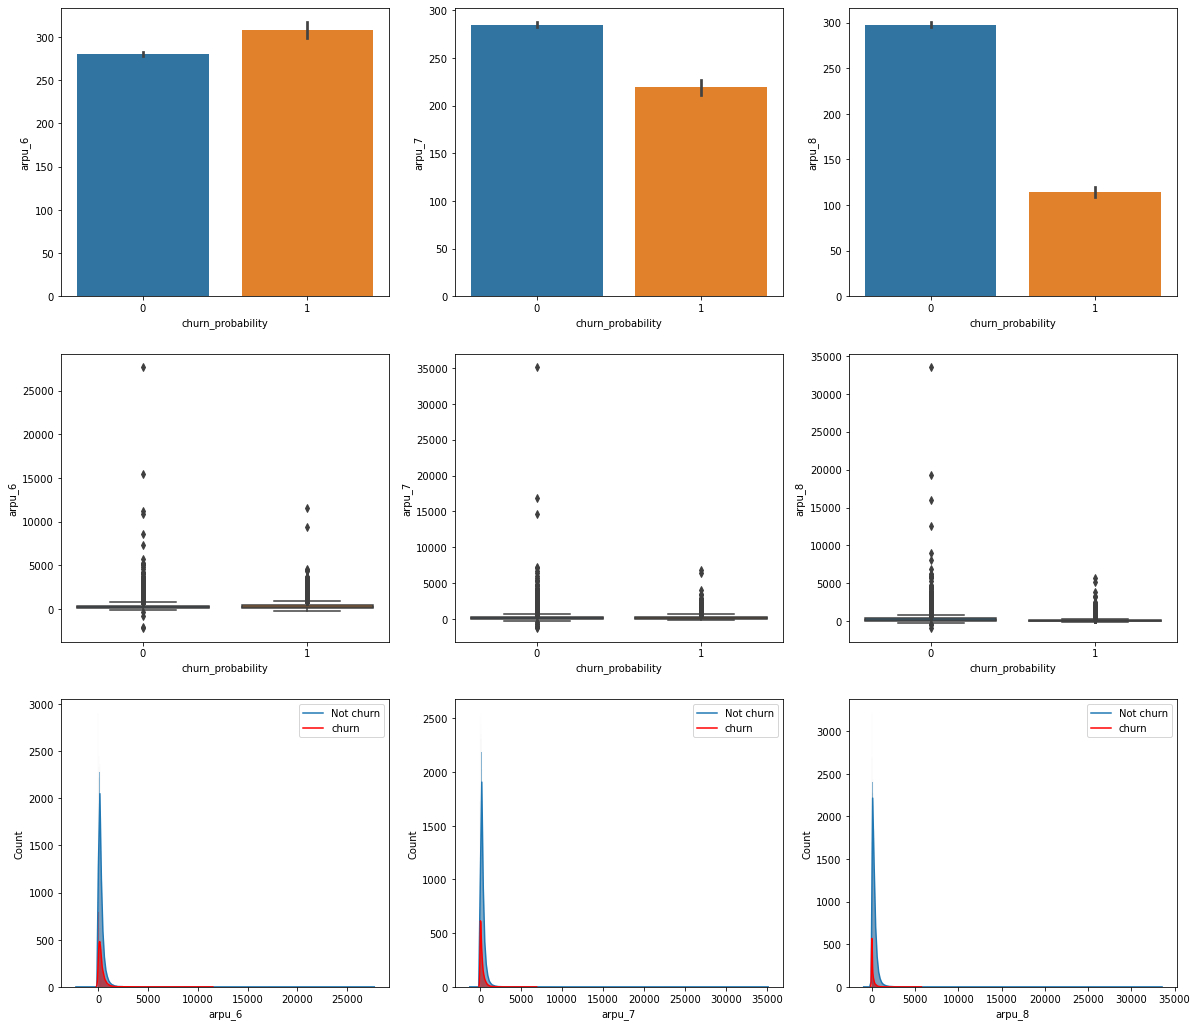

In [12]:
plot1('arpu_6', 'arpu_7', 'arpu_8', 1, 1, 1 )

Observations :- 
- In Month of 6, average revenue per user is more from Churn Users than Non Churn. 
- 50% revenue is equally in 7th Month.
- mobile_number is also unrelated with the problem, can be dropped.
- In the 6th, 7th and 8th month columns :- 
     - Majority of the columns are right skewed.
     - There are a lot of outliers in more than 95 % columns

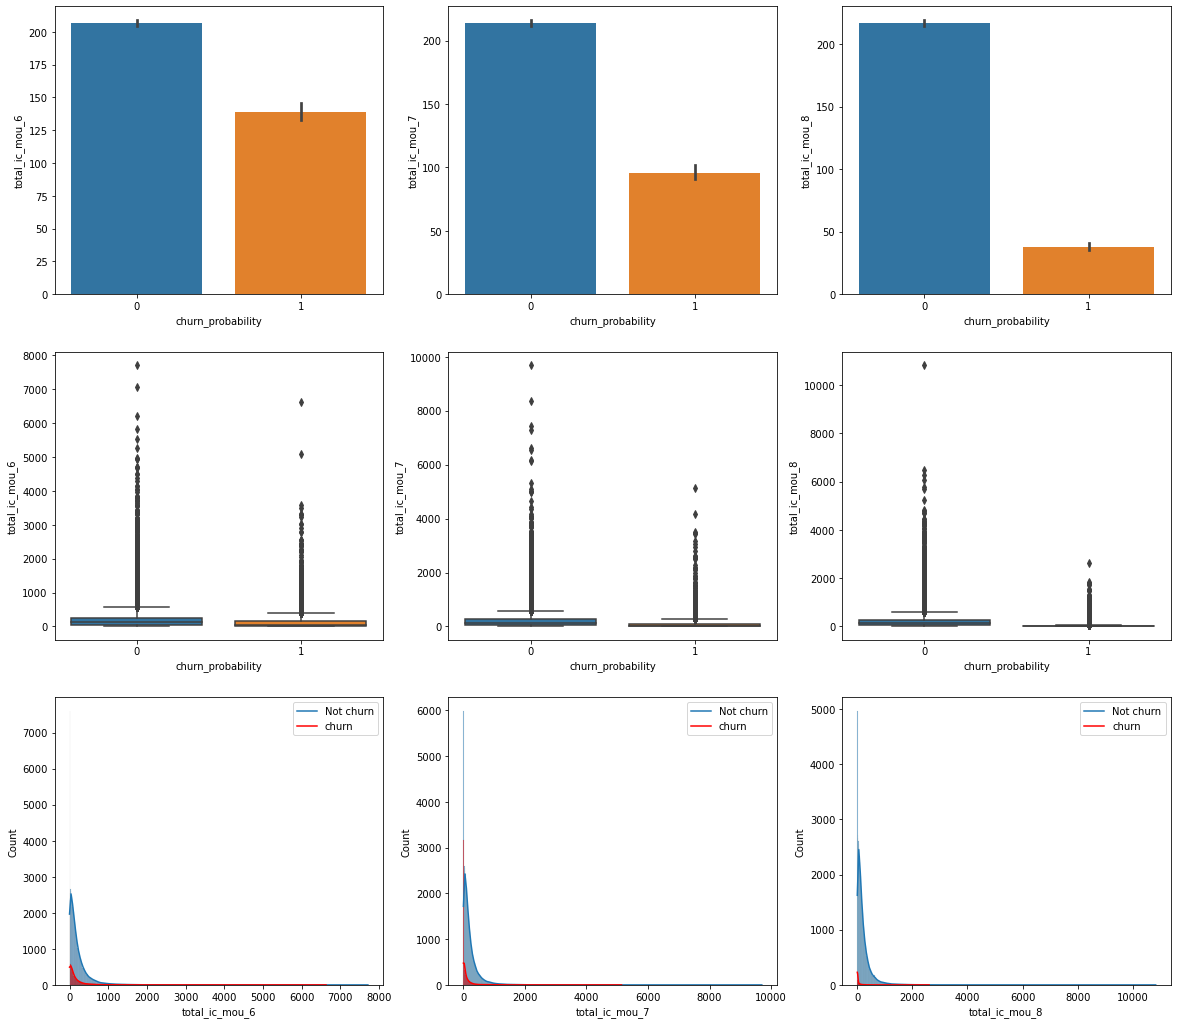

In [13]:
plot1('total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8' ,1,1,1)

Observations :- 
- Incoming calls reduce of Churn Users from 6 th 8 month 
- If the total incoming minutes of usage (total_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

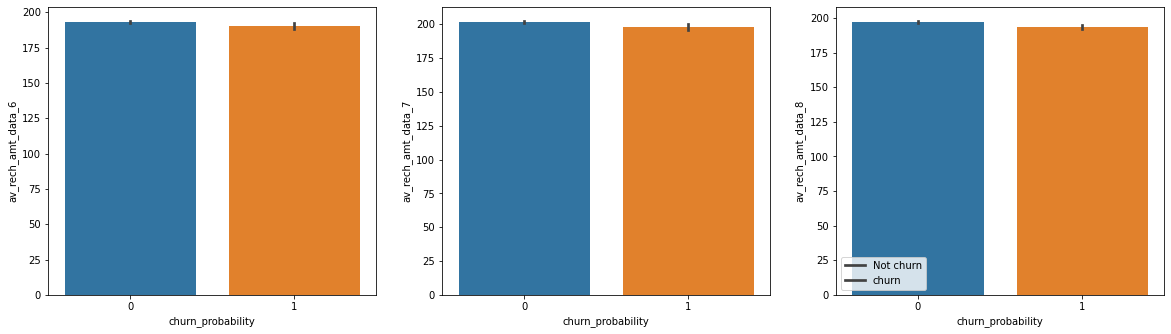

In [14]:
plot1('av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 1, 0, 0)

***Analysis***

As expected, the churn rate is more for the customers , whose average recharge is more.

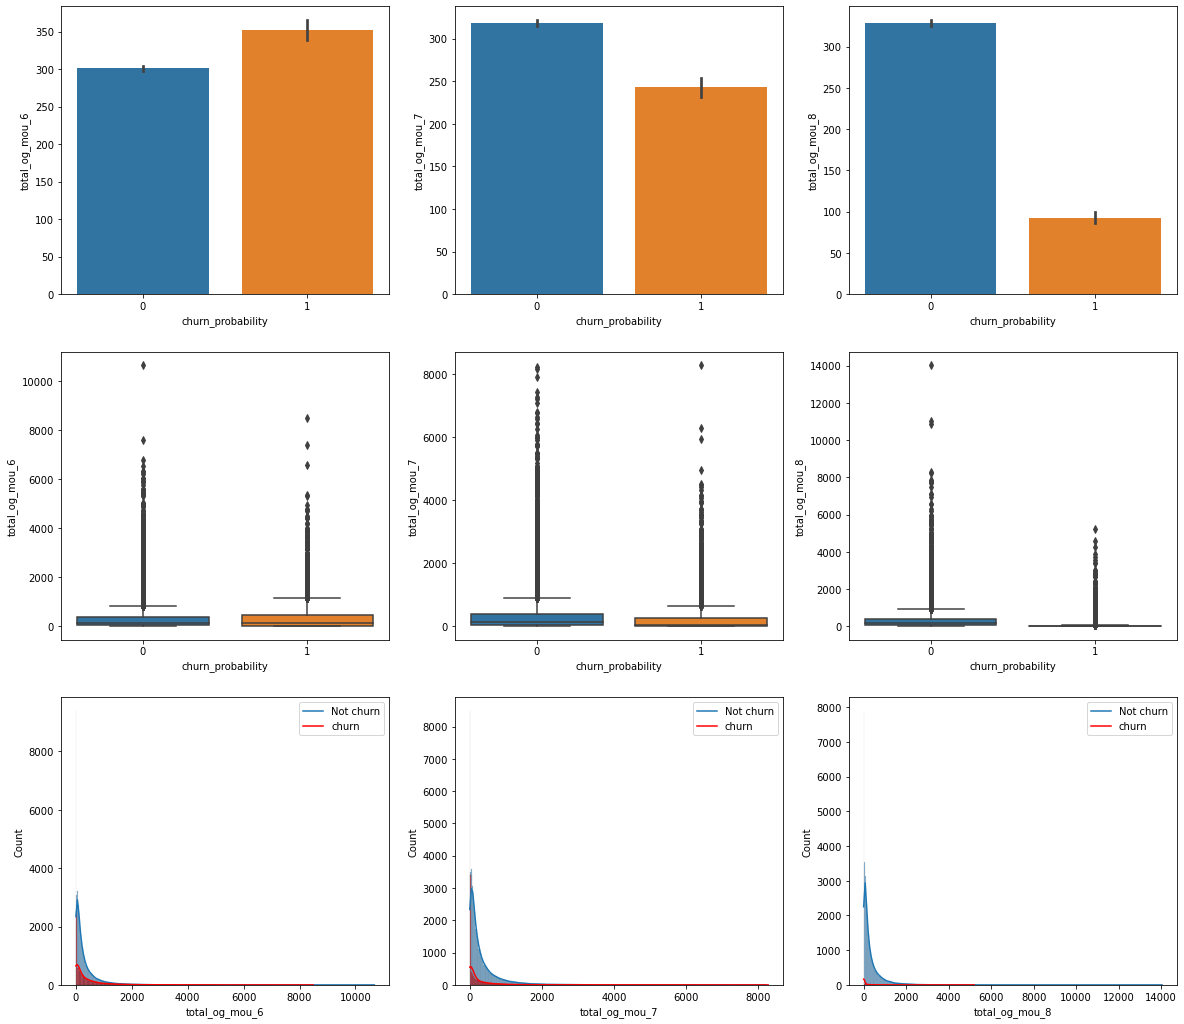

In [15]:
plot1('total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 1, 1, 1)

***Analysis***

Outgoing calls of Churn users decreases from good phase(6th month) to action phase(8th Month)

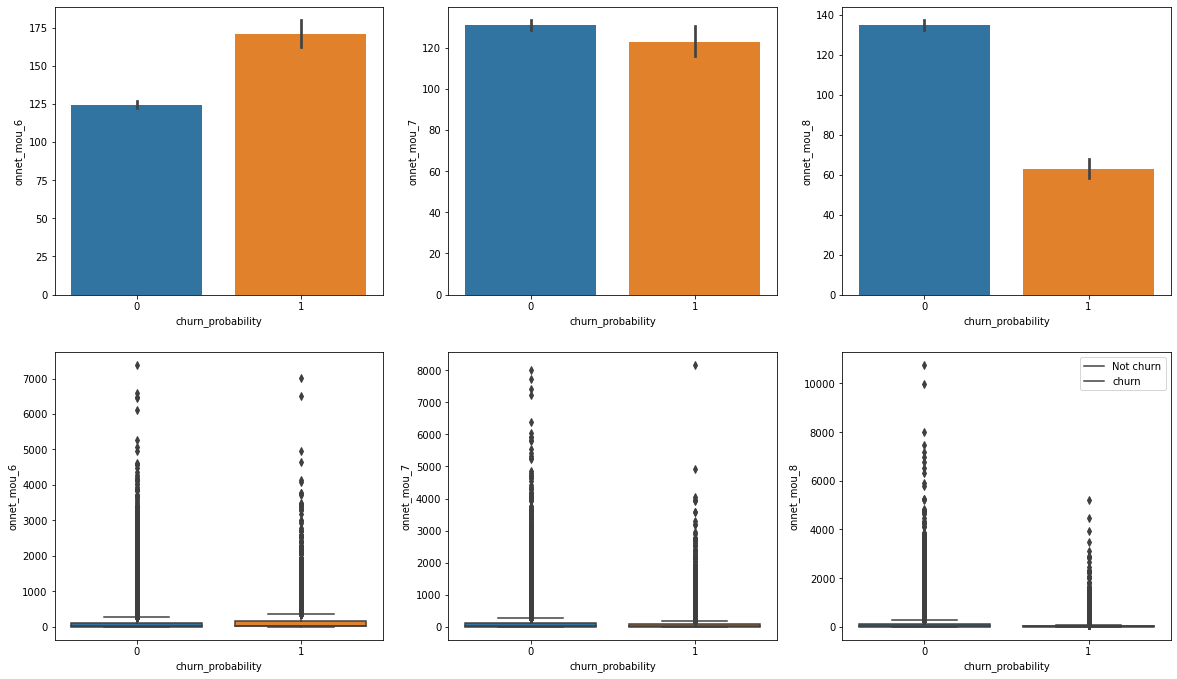

In [16]:
plot1('onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 1, 1,0)

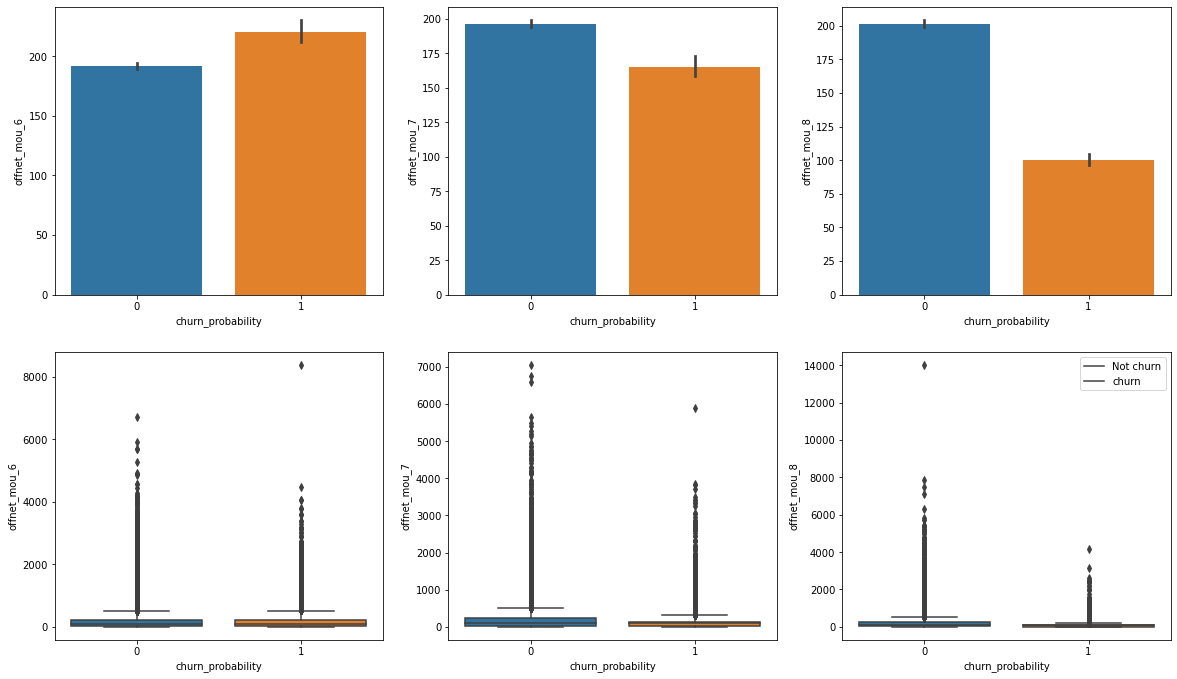

In [17]:
plot1('offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 1, 1,0)

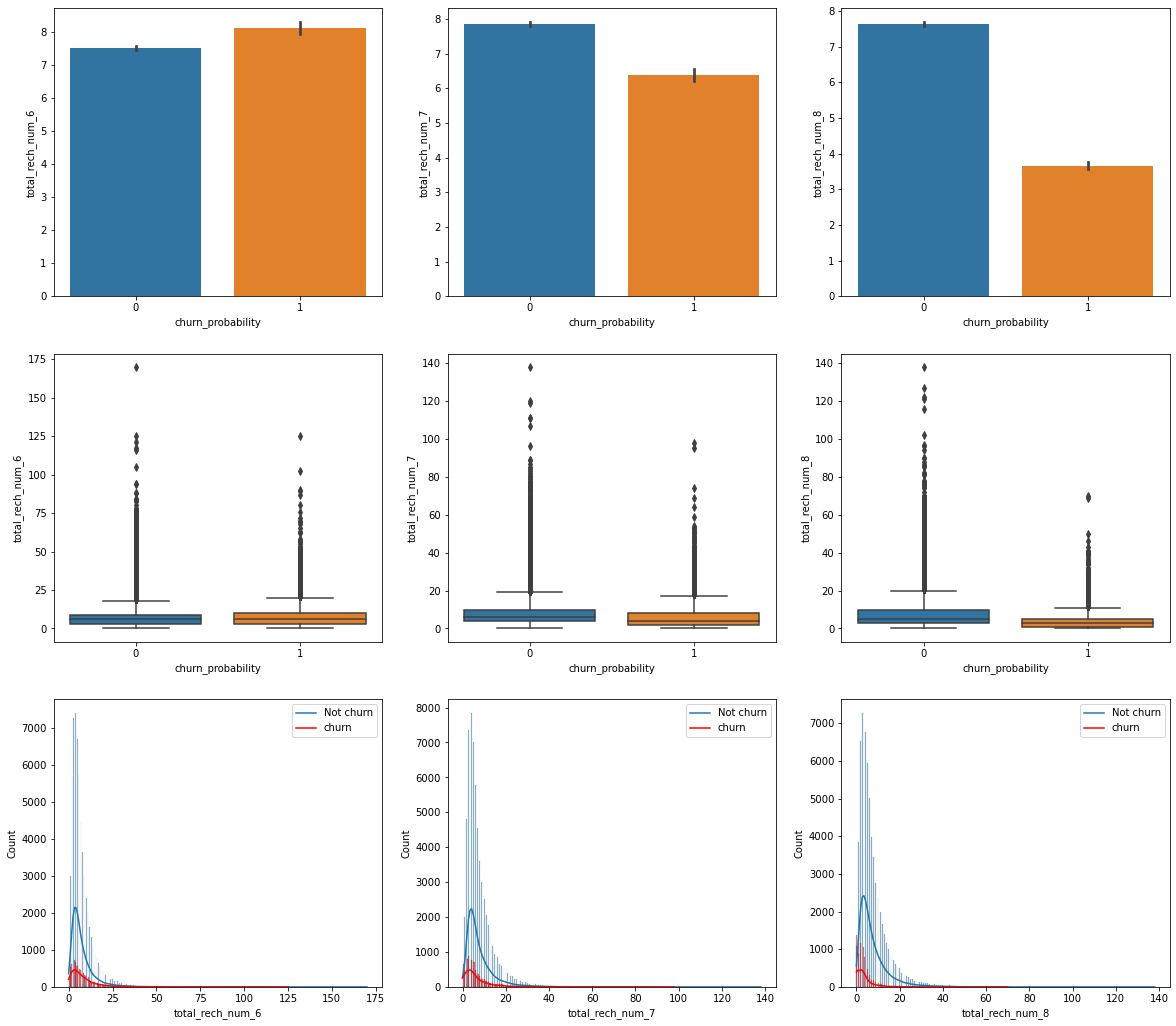

In [18]:
plot1('total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 1, 1, 1)

***Analysis***

The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

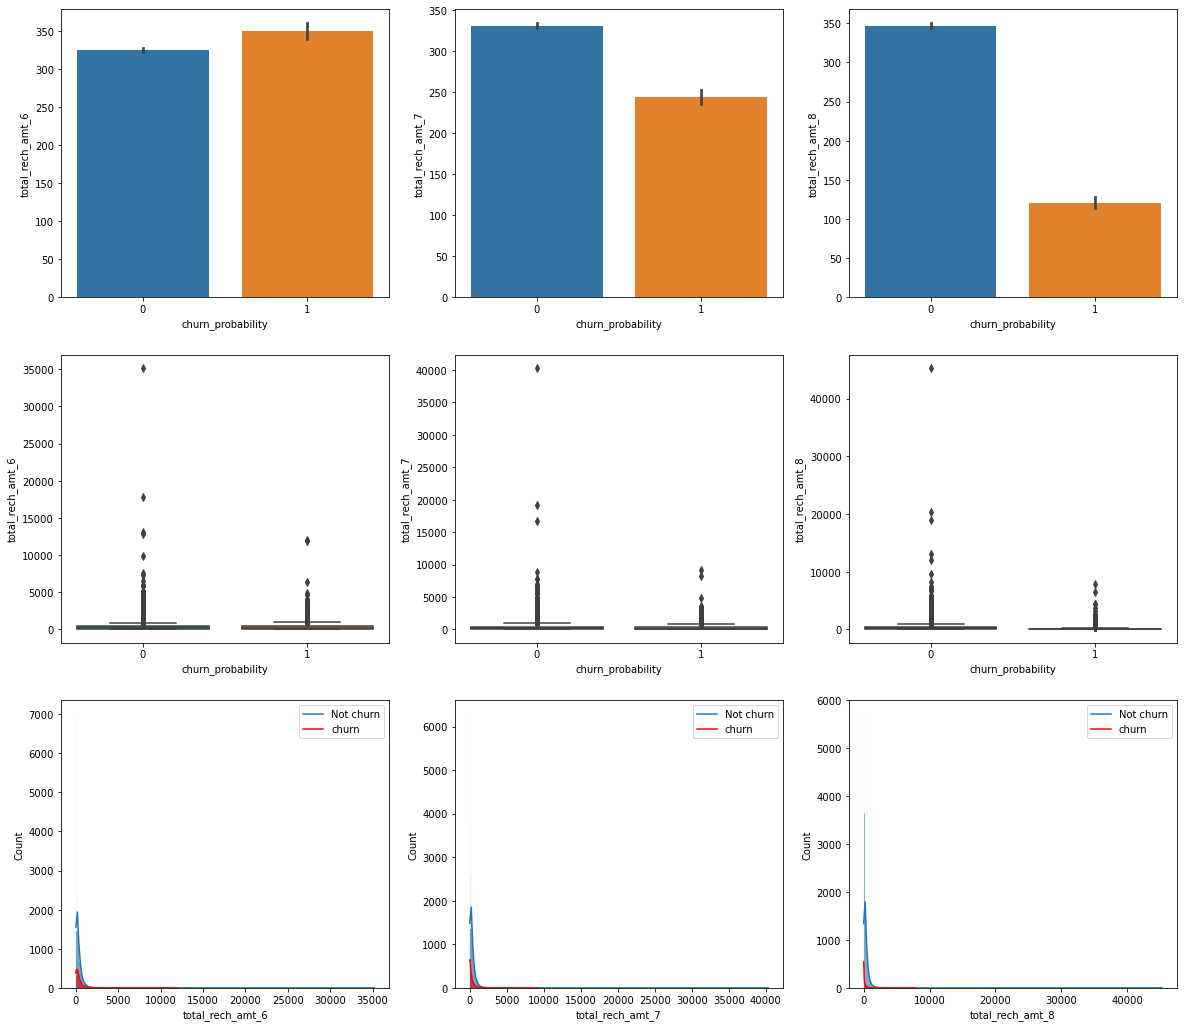

In [19]:
plot1('total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 1, 1, 1)

<AxesSubplot:xlabel='churn_probability', ylabel='aon'>

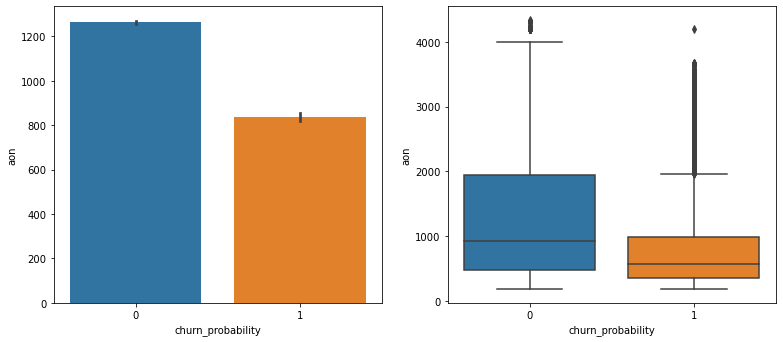

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn_probability', y = 'aon', data = df_train)
plt.subplot(2,3,2)
sns.boxplot(x = 'churn_probability', y = 'aon', data = df_train)

<AxesSubplot:xlabel='count_rech_3g_8', ylabel='count'>

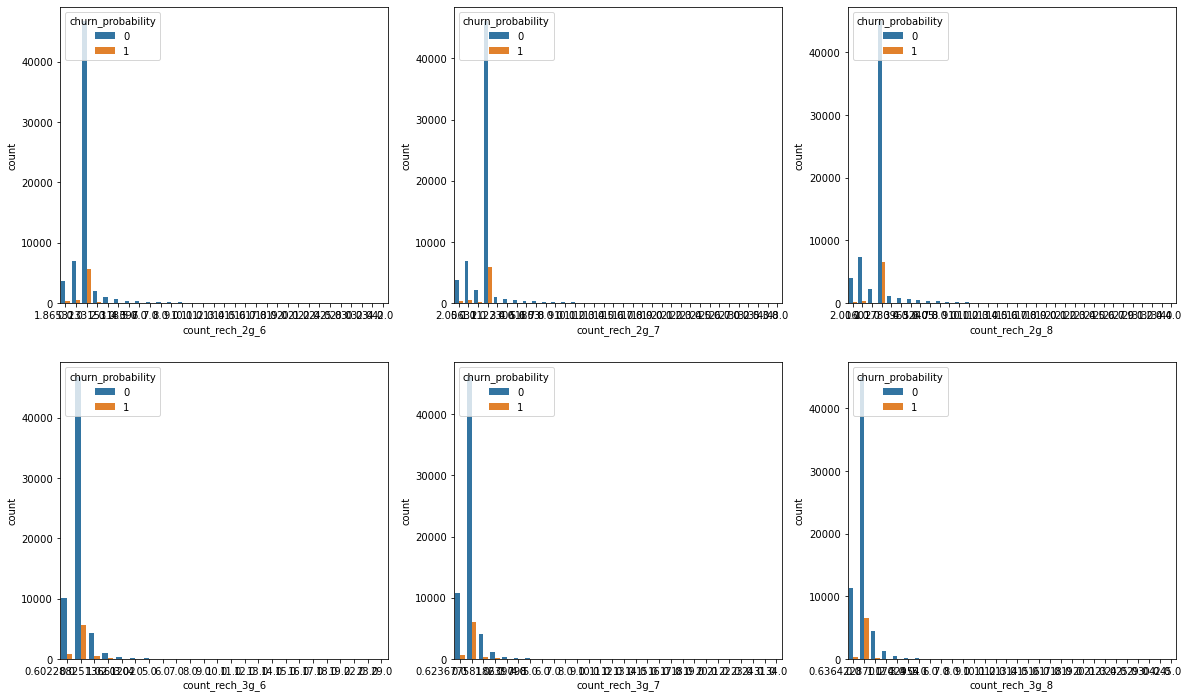

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(hue = 'churn_probability', x = 'count_rech_2g_6', data = df_train)
plt.subplot(2,3,2)
sns.countplot(hue = 'churn_probability', x = 'count_rech_2g_7', data = df_train)
plt.subplot(2,3,3)
sns.countplot(hue = 'churn_probability', x = 'count_rech_2g_8', data = df_train)
plt.subplot(2,3,4)
sns.countplot(hue = 'churn_probability', x = 'count_rech_3g_6', data = df_train)
plt.subplot(2,3,5)
sns.countplot(hue = 'churn_probability', x = 'count_rech_3g_7', data = df_train)
plt.subplot(2,3,6)
sns.countplot(hue = 'churn_probability', x = 'count_rech_3g_8', data = df_train)

In [22]:
def plot1(col1, col2, col3, p1, p2, p3):
    plt.figure(figsize=(20, 18))
    if p1==1:
        plt.subplot(3,3,1)
        sns.barplot(x = 'churn_probability', y = col1, data = df_train)
        plt.subplot(3,3,2)
        sns.barplot(x = 'churn_probability', y = col2, data = df_train)
        plt.subplot(3,3,3)
        sns.barplot(x = 'churn_probability', y = col3, data = df_train)
    if p2 ==1:
        plt.subplot(3,3,4)
        sns.boxplot(x = 'churn_probability', y = col1, data = df_train)
        plt.subplot(3,3,5)
        sns.boxplot(x = 'churn_probability', y = col2, data = df_train)
        plt.subplot(3,3,6)
        sns.boxplot(x = 'churn_probability', y = col3, data = df_train)
    if p3 ==1:
        plt.subplot(3,3,7)
        sns.histplot(df_train[df_train['churn_probability'] == 0][col1], kde = True)
        sns.histplot(df_train[df_train['churn_probability'] == 1][col1], color = 'red', kde=True)
        plt.legend(['Not churn', 'churn'])
        plt.subplot(3,3,8)
        sns.histplot(df_train[df_train['churn_probability'] == 0][col2], kde = True)
        sns.histplot(df_train[df_train['churn_probability'] == 1][col2], color = 'red', kde=True)
        plt.legend(['Not churn', 'churn'])
        plt.subplot(3,3,9)
        sns.histplot(df_train[df_train['churn_probability'] == 0][col3], kde = True)
        sns.histplot(df_train[df_train['churn_probability'] == 1][col3], color = 'red', kde=True)
    plt.legend(['Not churn', 'churn'])

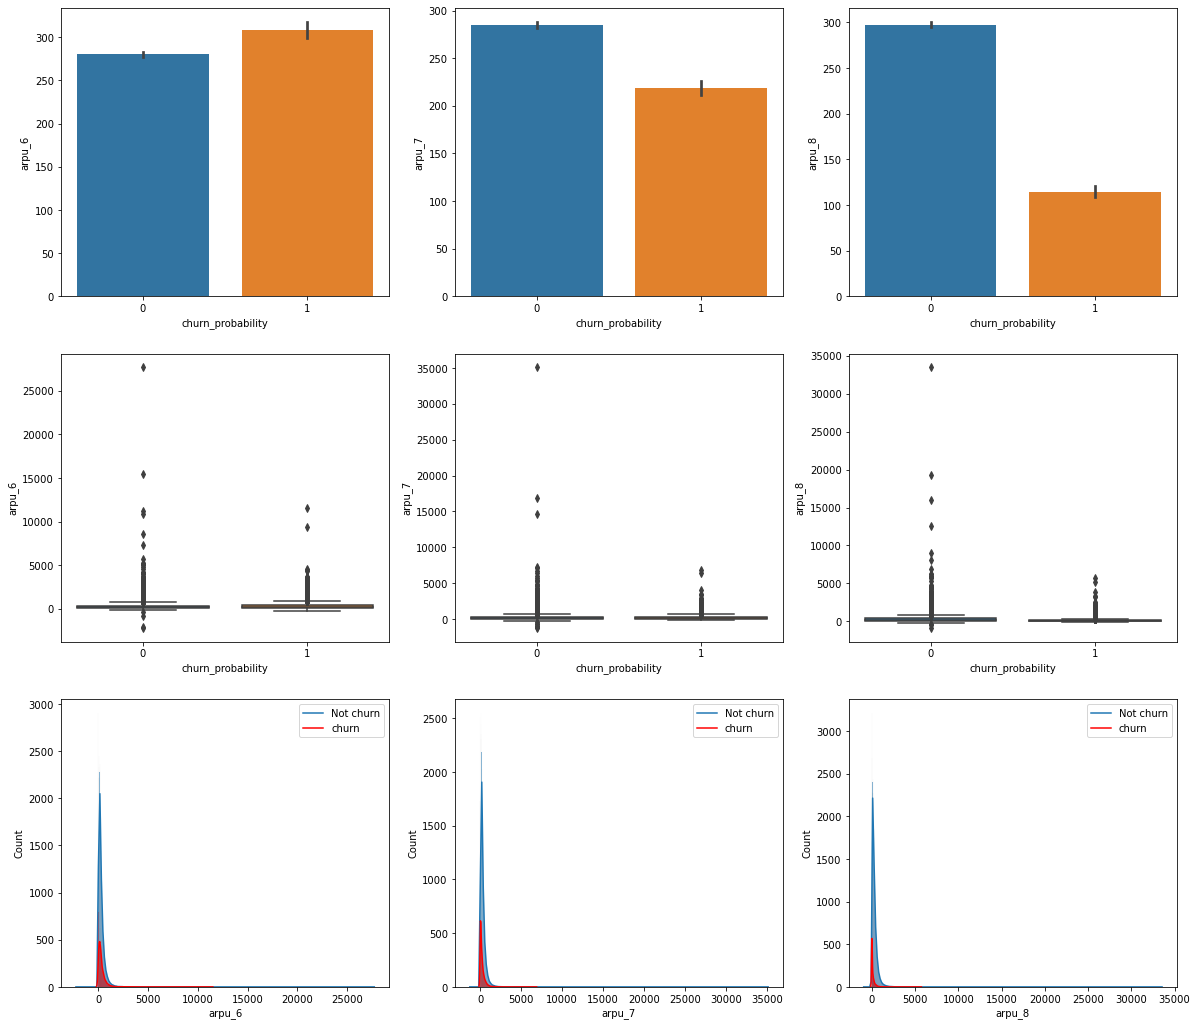

In [23]:
plot1('arpu_6', 'arpu_7', 'arpu_8', 1, 1, 1 )

Observations :- 
- In Month of 6, average revenue per user is more from Churn Users than Non Churn. 
- 50% revenue is equally in 7th Month.
- mobile_number is also unrelated with the problem, can be dropped.
- In the 6th, 7th and 8th month columns :- 
     - Majority of the columns are right skewed.
     - There are a lot of outliers in more than 95 % columns

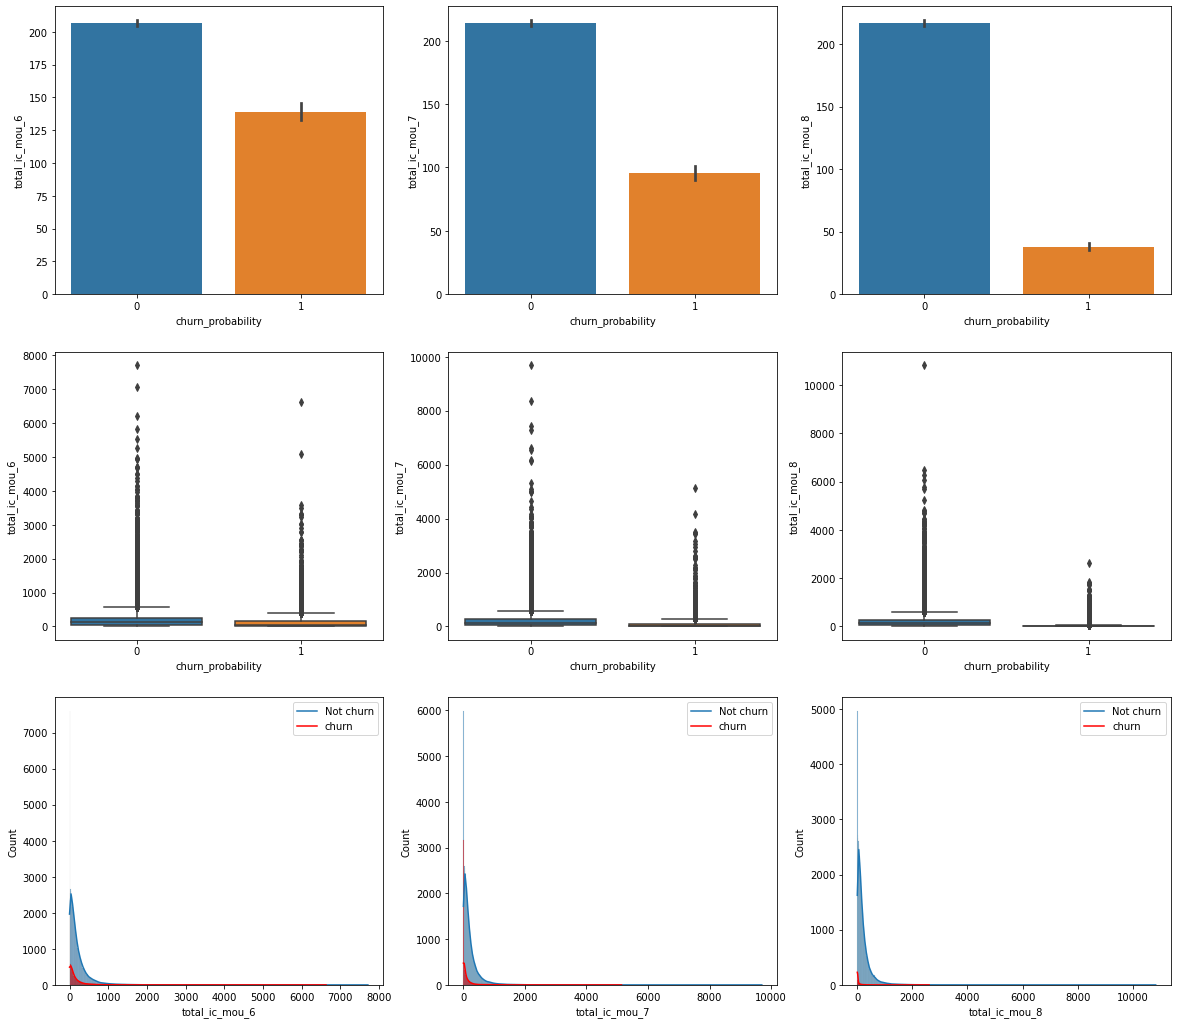

In [24]:
plot1('total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8' ,1,1,1)

Observations :- 
- Incoming calls reduce of Churn Users from 6 th 8 month 
- If the total incoming minutes of usage (total_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

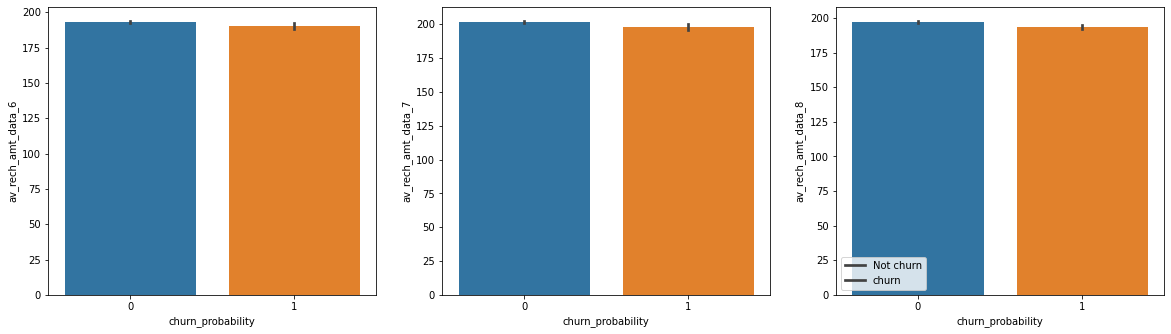

In [25]:
plot1('av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 1, 0, 0)

***Analysis***

As expected, the churn rate is more for the customers , whose average recharge is more.

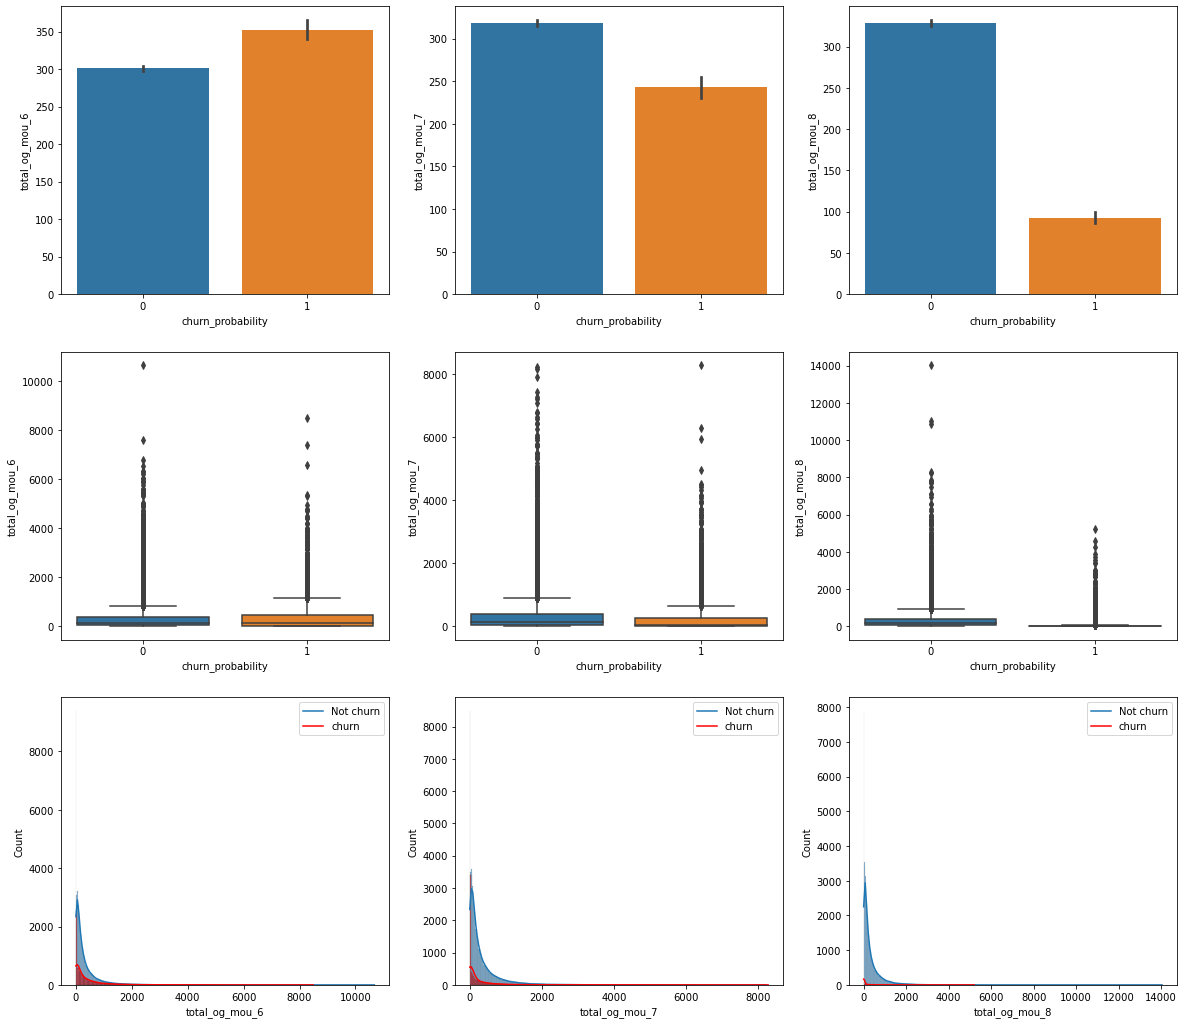

In [26]:
plot1('total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 1, 1, 1)

***Analysis***

Outgoing calls of Churn users decreases from good phase(6th month) to action phase(8th Month)

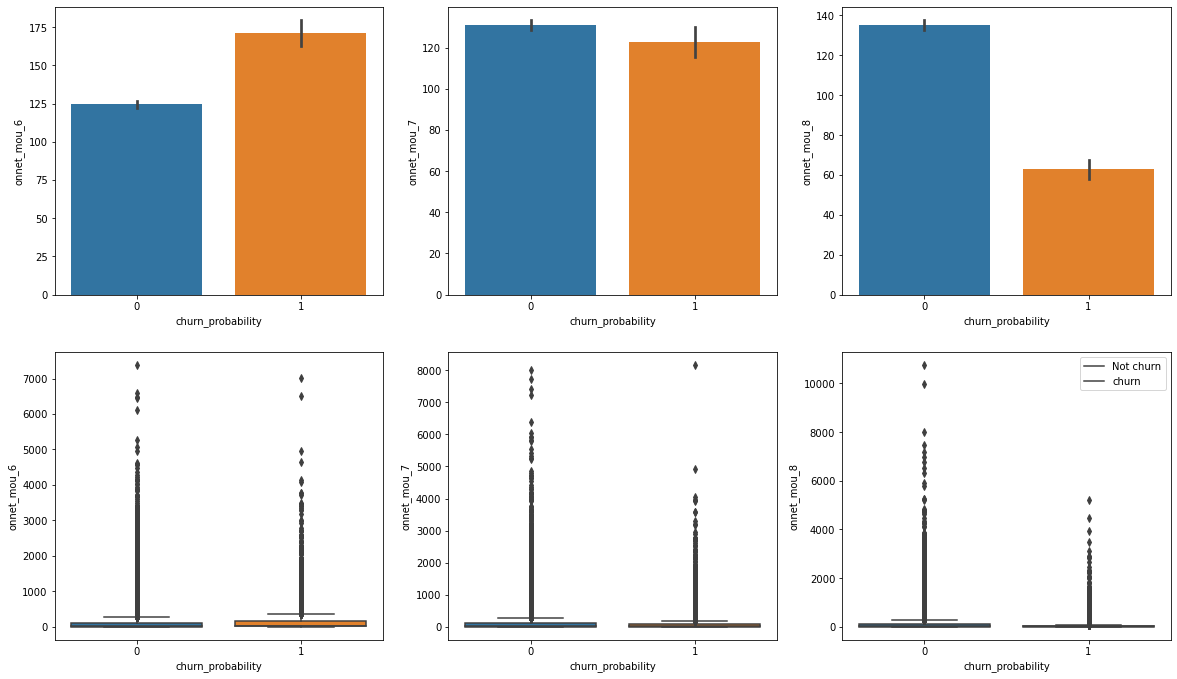

In [27]:
plot1('onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 1, 1,0)

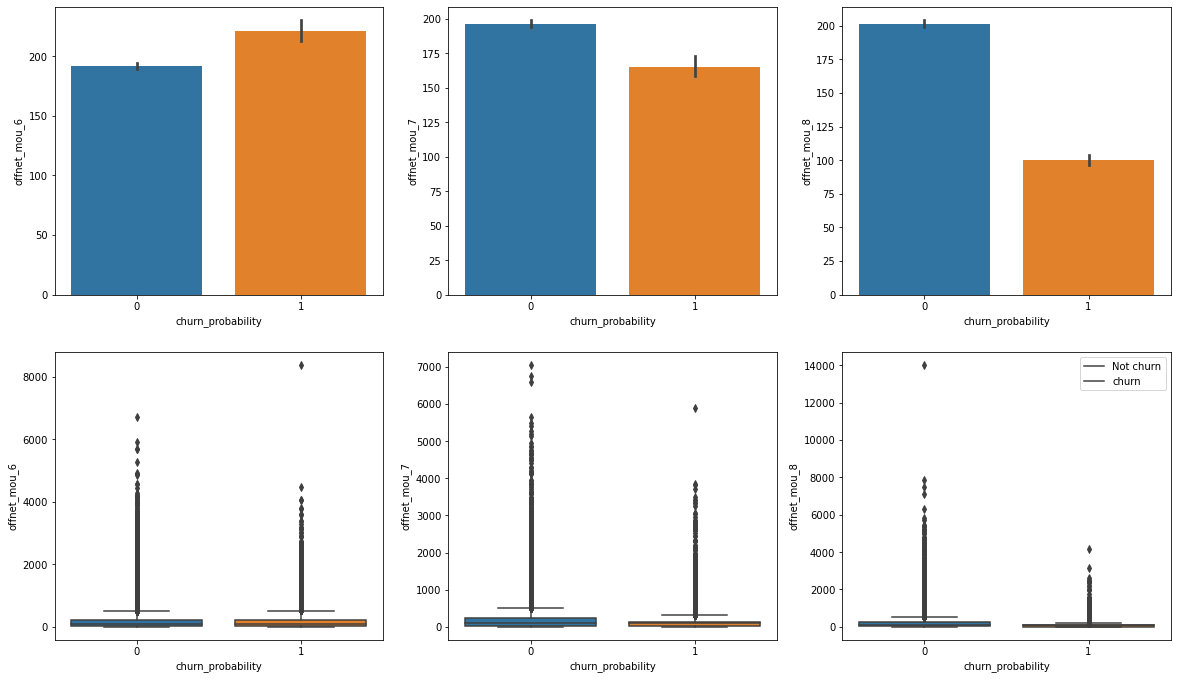

In [28]:
plot1('offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 1, 1,0)

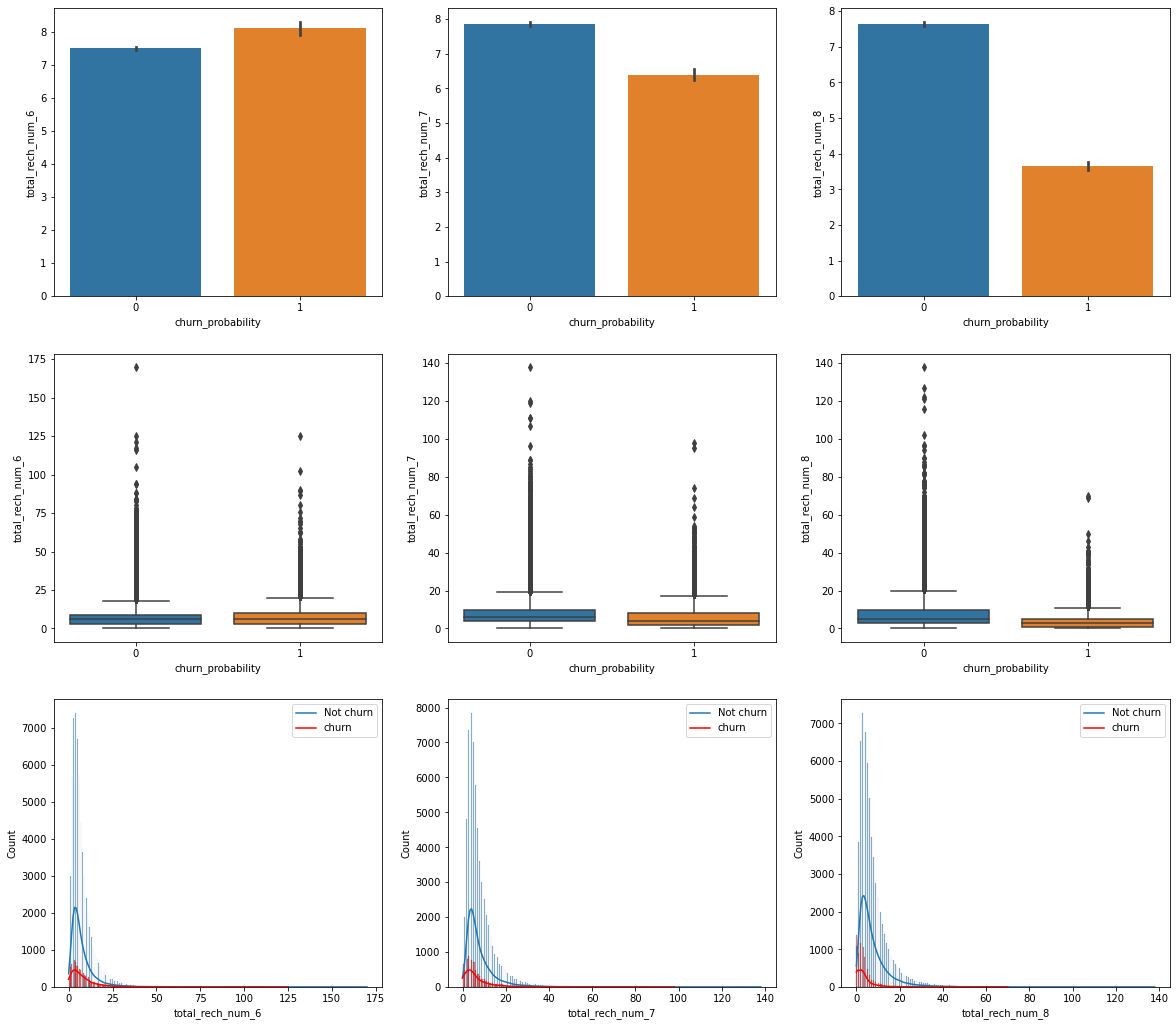

In [29]:
plot1('total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 1, 1, 1)

***Analysis***

The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

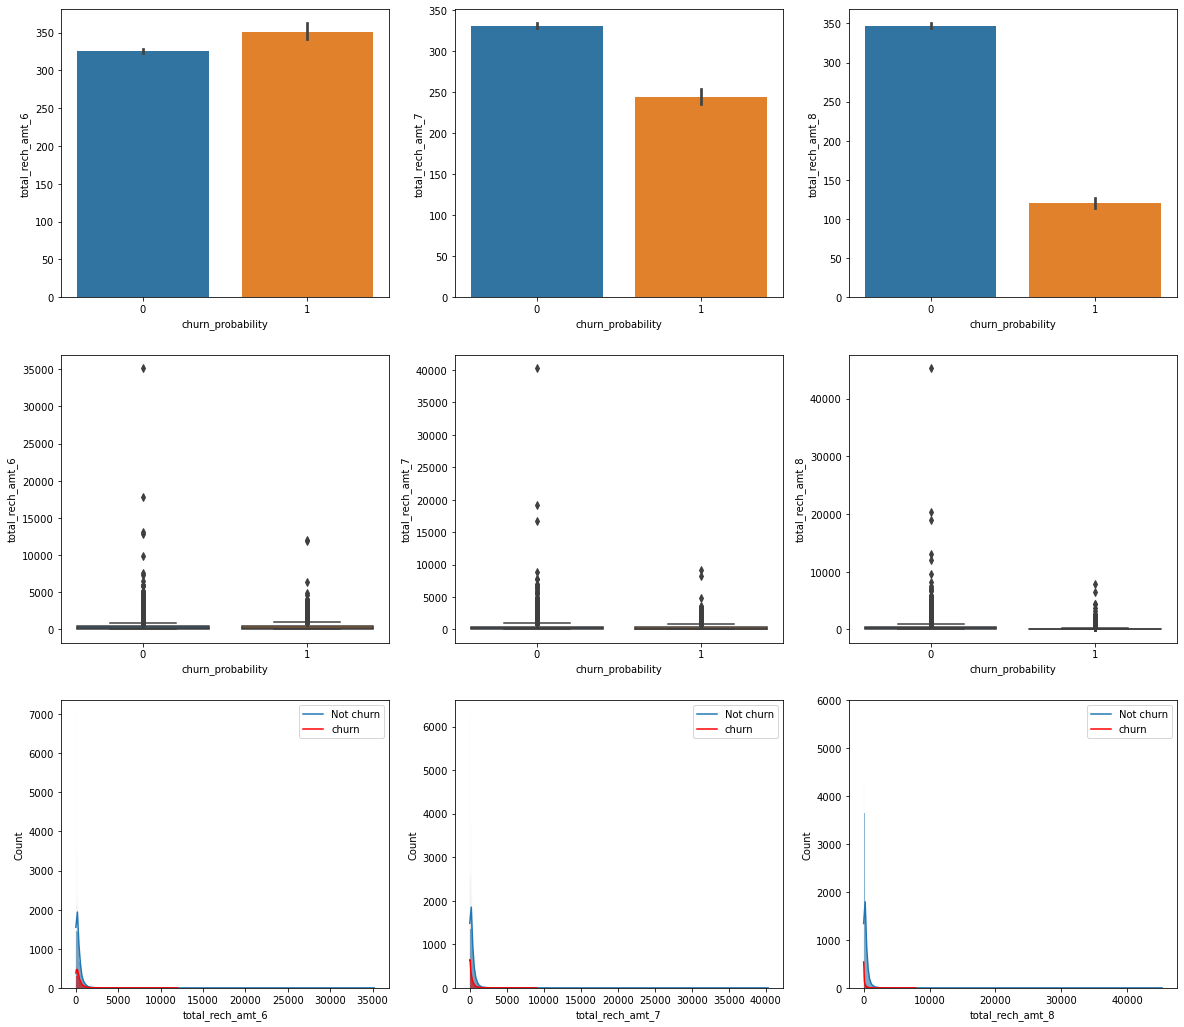

In [30]:
plot1('total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 1, 1, 1)

<AxesSubplot:xlabel='churn_probability', ylabel='aon'>

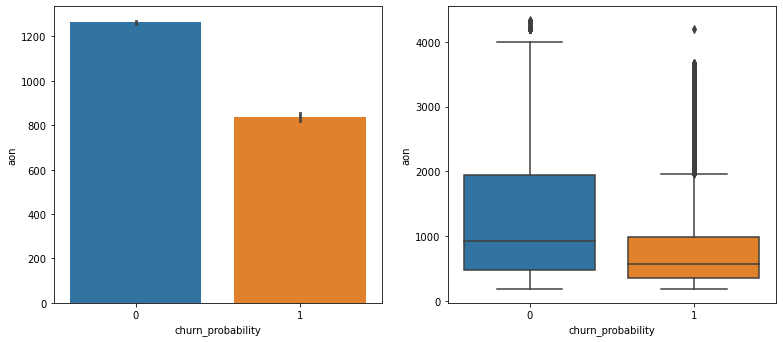

In [31]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn_probability', y = 'aon', data = df_train)
plt.subplot(2,3,2)
sns.boxplot(x = 'churn_probability', y = 'aon', data = df_train)

<AxesSubplot:xlabel='count_rech_3g_8', ylabel='count'>

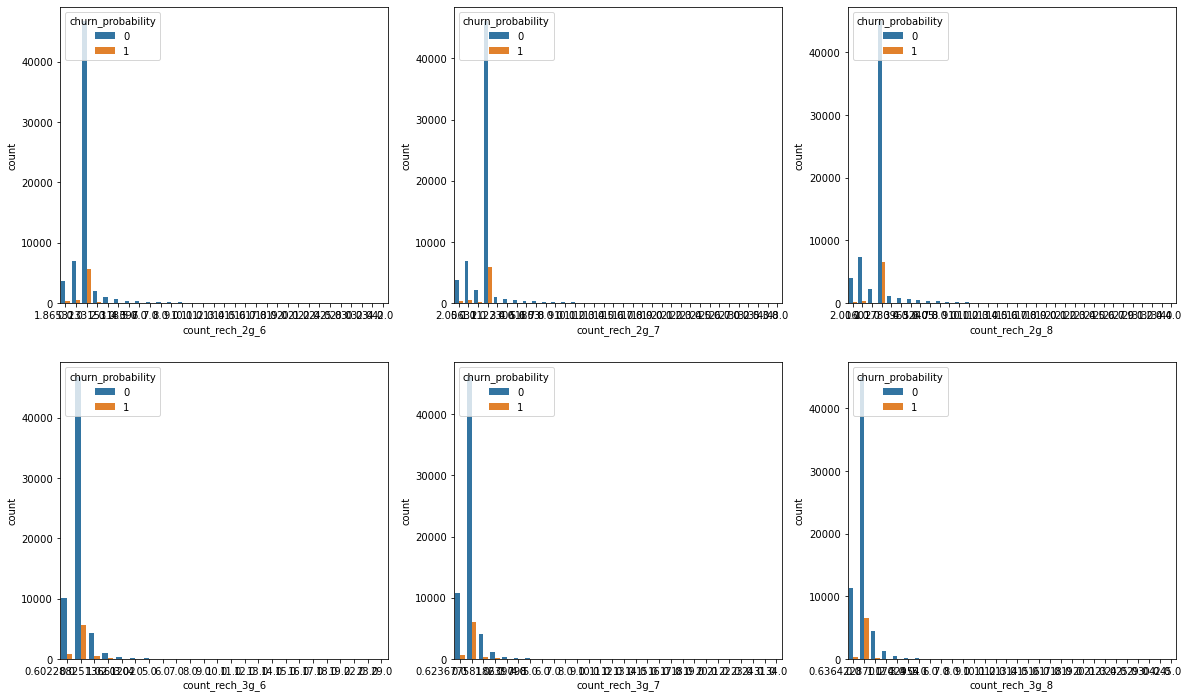

In [32]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(hue = 'churn_probability', x = 'count_rech_2g_6', data = df_train)
plt.subplot(2,3,2)
sns.countplot(hue = 'churn_probability', x = 'count_rech_2g_7', data = df_train)
plt.subplot(2,3,3)
sns.countplot(hue = 'churn_probability', x = 'count_rech_2g_8', data = df_train)
plt.subplot(2,3,4)
sns.countplot(hue = 'churn_probability', x = 'count_rech_3g_6', data = df_train)
plt.subplot(2,3,5)
sns.countplot(hue = 'churn_probability', x = 'count_rech_3g_7', data = df_train)
plt.subplot(2,3,6)
sns.countplot(hue = 'churn_probability', x = 'count_rech_3g_8', data = df_train)

<AxesSubplot:xlabel='churn_probability', ylabel='vol_3g_mb_8'>

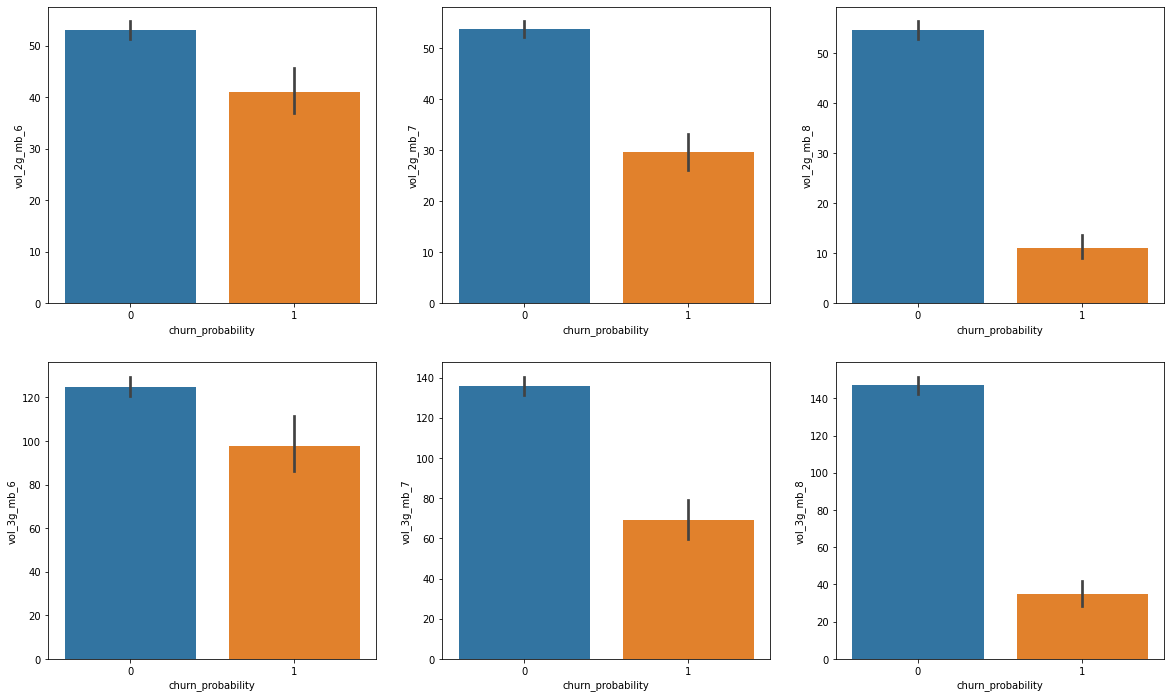

In [33]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn_probability', y = 'vol_2g_mb_6', data = df_train)
plt.subplot(2,3,2)
sns.barplot(x = 'churn_probability', y = 'vol_2g_mb_7', data = df_train)
plt.subplot(2,3,3)
sns.barplot(x = 'churn_probability', y = 'vol_2g_mb_8', data = df_train)
plt.subplot(2,3,4)
sns.barplot(x = 'churn_probability', y = 'vol_3g_mb_6', data = df_train)
plt.subplot(2,3,5)
sns.barplot(x = 'churn_probability', y = 'vol_3g_mb_7', data = df_train)
plt.subplot(2,3,6)
sns.barplot(x = 'churn_probability', y = 'vol_3g_mb_8', data = df_train)

In [34]:
rech_df = df_train.filter(regex = 'rech')
print(rech_df.columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')


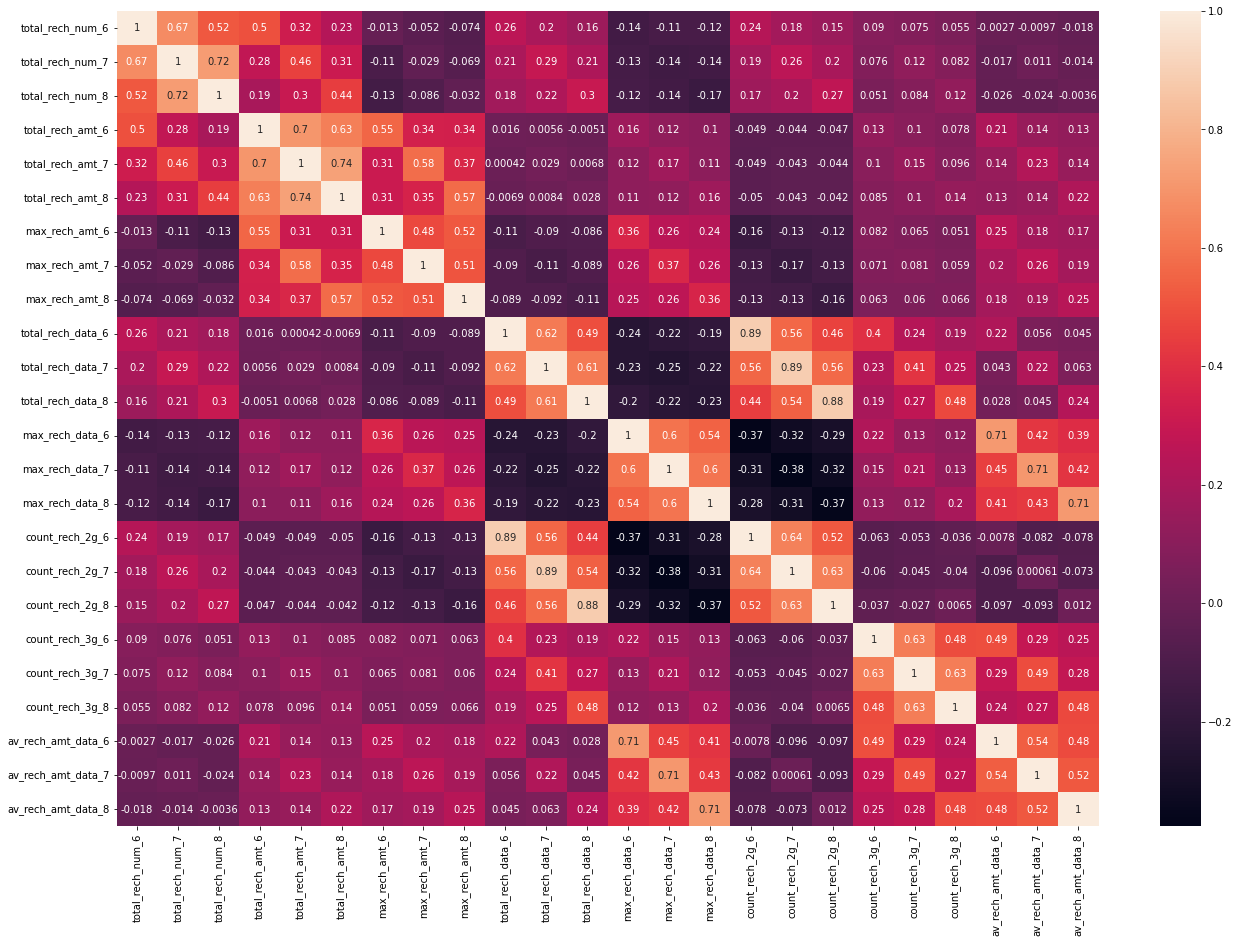

In [35]:
fig = plt.figure(figsize=(22, 15))
sns.heatmap(rech_df.corr(), annot = True)
plt.show()

High correlation between Average Recharge Amount and Rechage amounts for 6 and 7
This is expected as the recharge amount is calculated for purpose of filtering high value customers
There is high correlation 80% between data recharge for month 7 and recharge for month 8.
Any factor that has correlation with month 8 is probably correlated to the churn prediction

count recharge have high correlation

In [36]:
total_df = df_train.filter(regex = 'total')
total_df.columns

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8'],
      dtype='object')

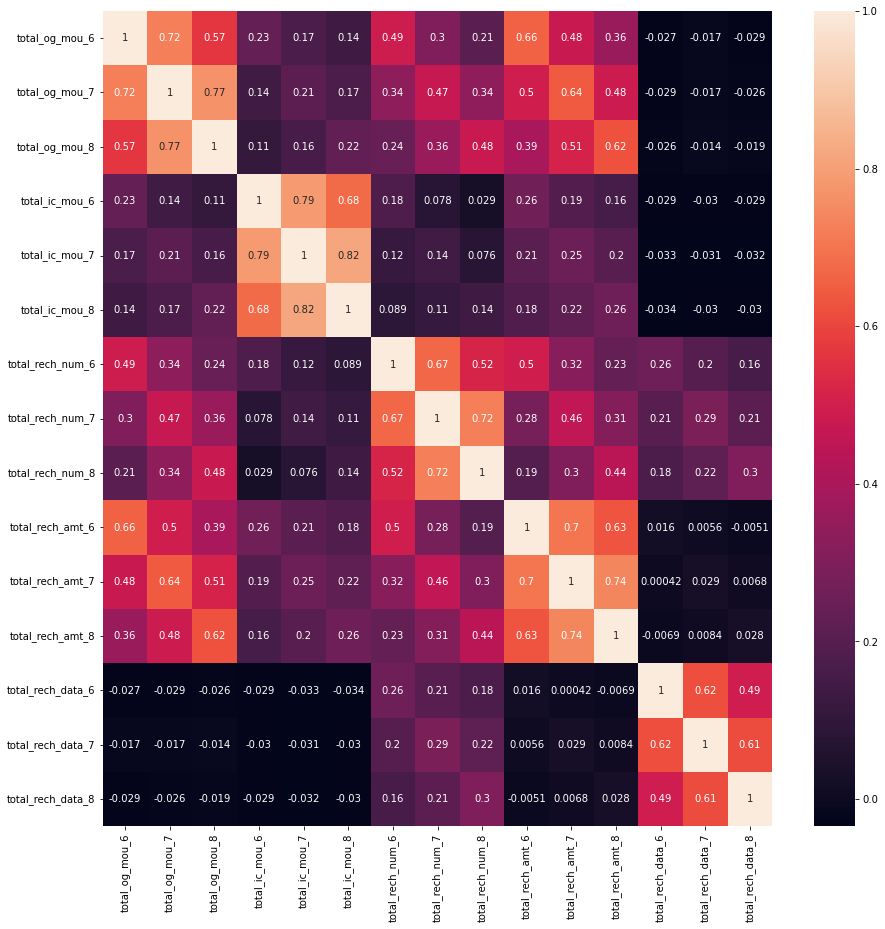

In [37]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(total_df.corr(), annot = True)
plt.show()

total_og_mou high corr

There is greater than 70% and some cases 82% correlation between months 7 and 8 regarding Incoming & Outgoing minutes of usage
This is probabaly due to the fact that if there is heavy usage in month 7 then subsequently in month 8 there is also heavy usage - The cusotmer will not churn if there is heavy usage and vice versa

In [38]:
amt_df = df_train.filter(regex='amt')
print(amt_df.columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')


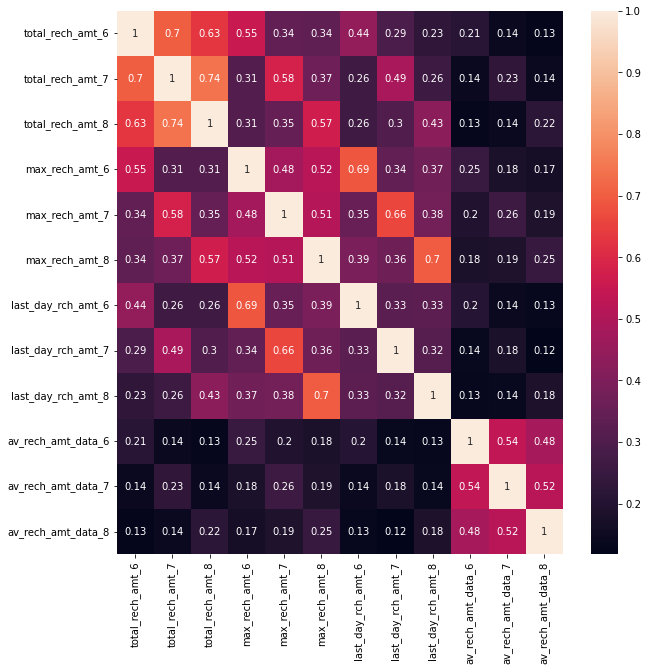

In [39]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(amt_df.corr(), annot = True)
plt.show()

Some of this correlation is the same as the First Recharge Amount correlation
There is also higher correlation between the Max Recharge Amount in month 8 (Bad Phase) and the Last Day Recharge Amount
This could indicate that if a customer is not going to Churn then they Recharge for a higher amount in month 8

last day rech amt

In [40]:
ic_mou_df = df_train.filter(regex='ic.*mou')
print(ic_mou_df.columns)

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8'],
      dtype='object')


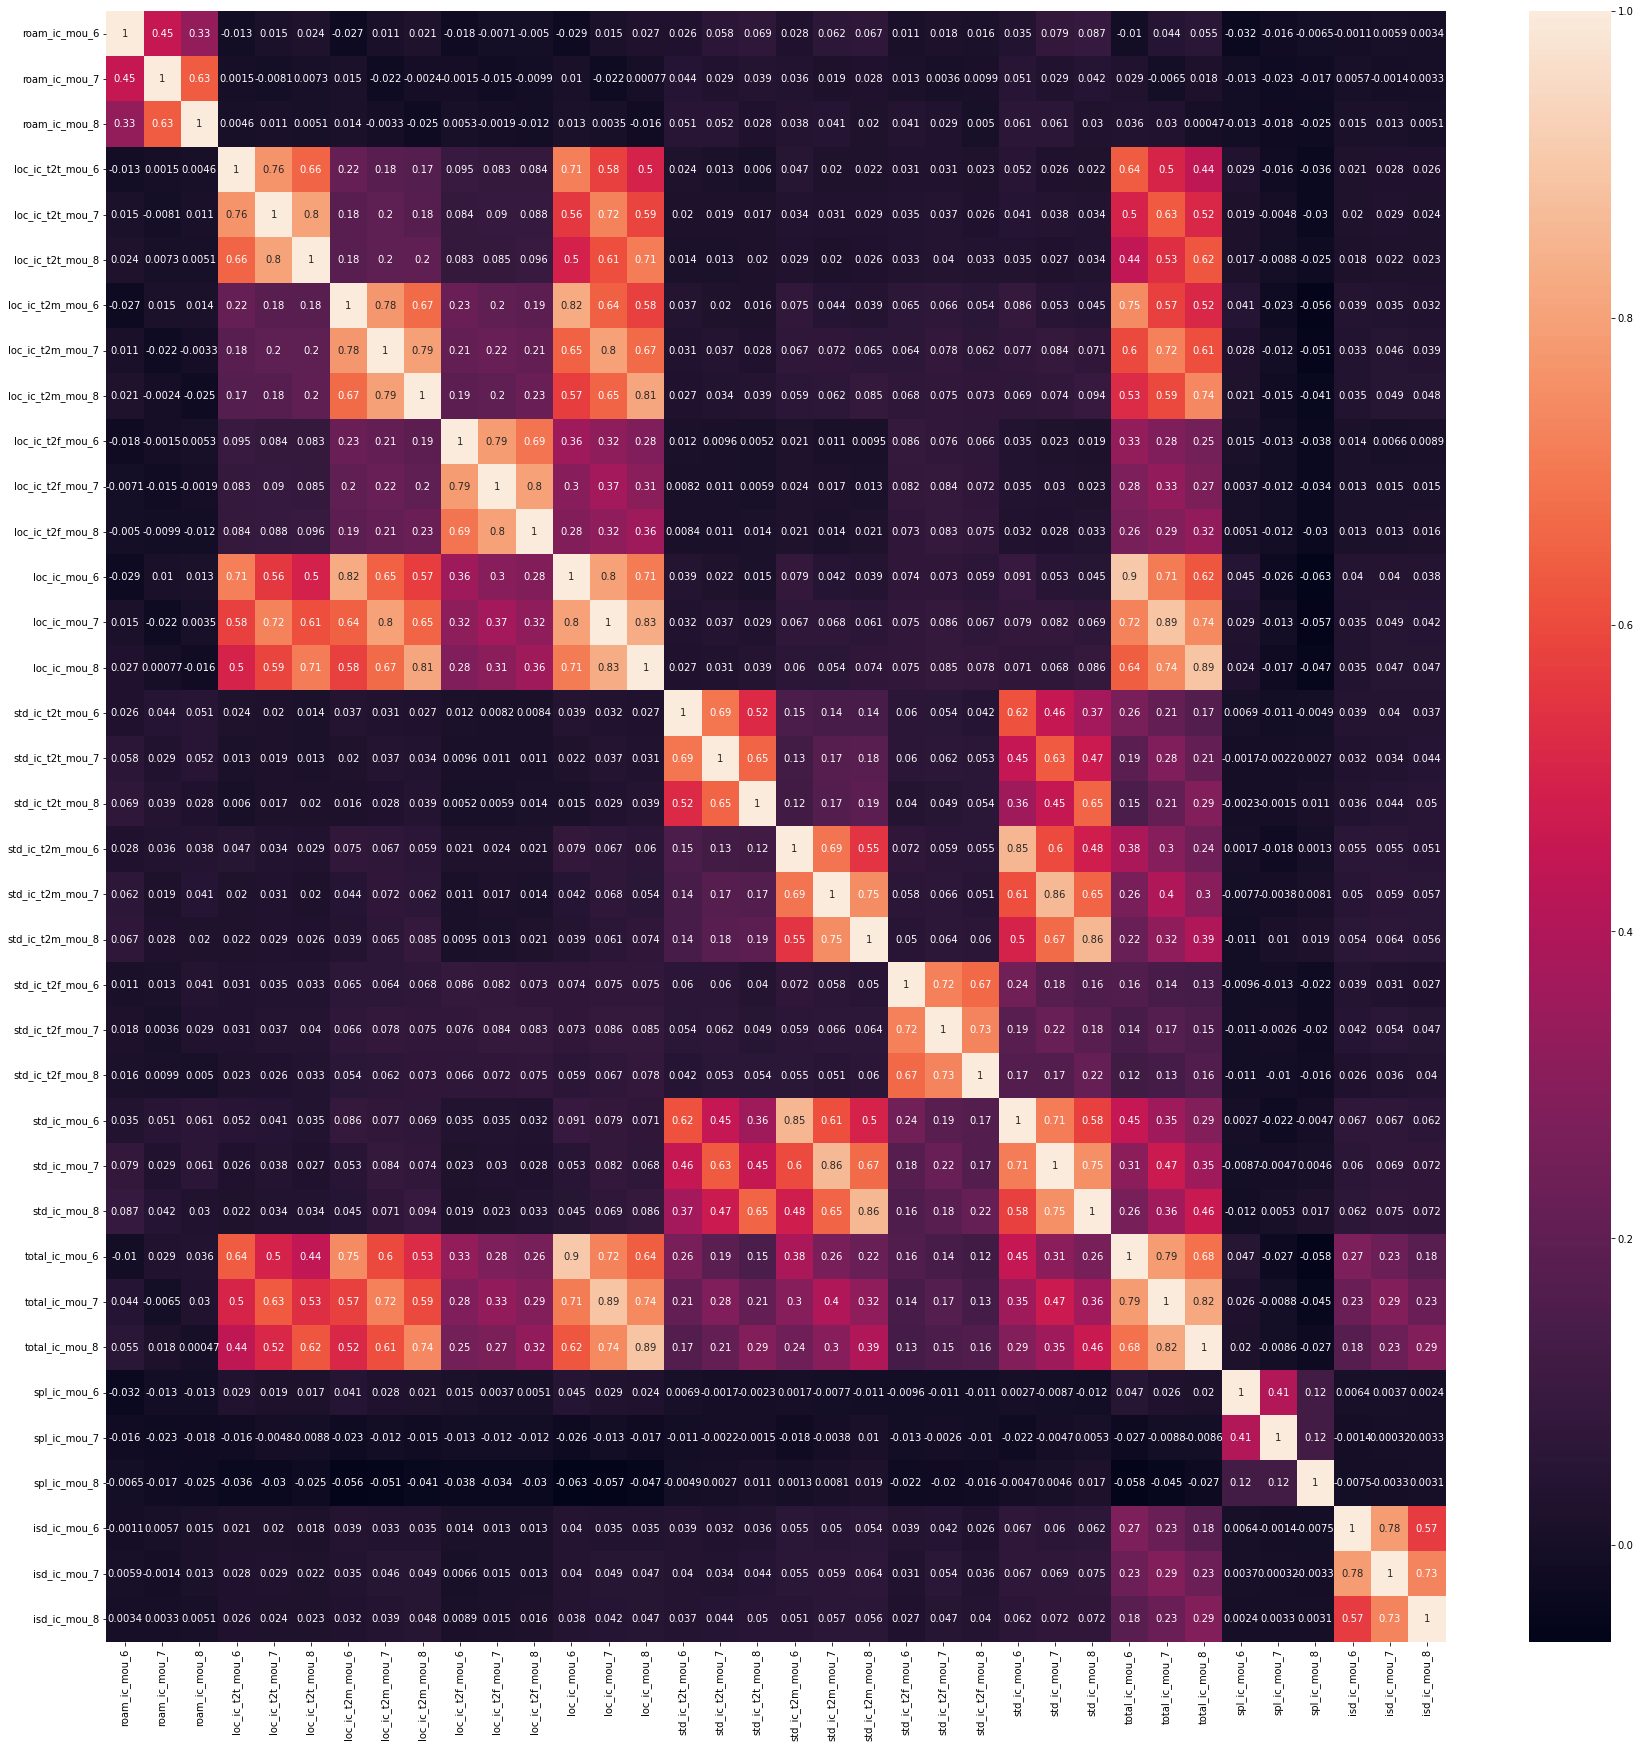

In [41]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(ic_mou_df.corr(), annot = True)
plt.show()

local_ic_t2m_mou,local_ic_mou, std_ic_t2m_mou

Total Incoming minutes of usage is almost entirely explained by the LOCAL call usage and not a lot by the STD calls
Total Incoming minutes of usage of month 8 is also correlated to the month 7. Indicating that if a customer has High MOU in month 7 then they will continue to have High MOU in month 8
The STD Incoming MOU is fully explained by the T2M Minutes of Usage
High Correlation between Incoming T2T Usage for Months 6 and 7 and Months 7 and 8

In [42]:
og_mou_df = df_train.filter(regex='og.*mou')
print(og_mou_df.columns)

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')


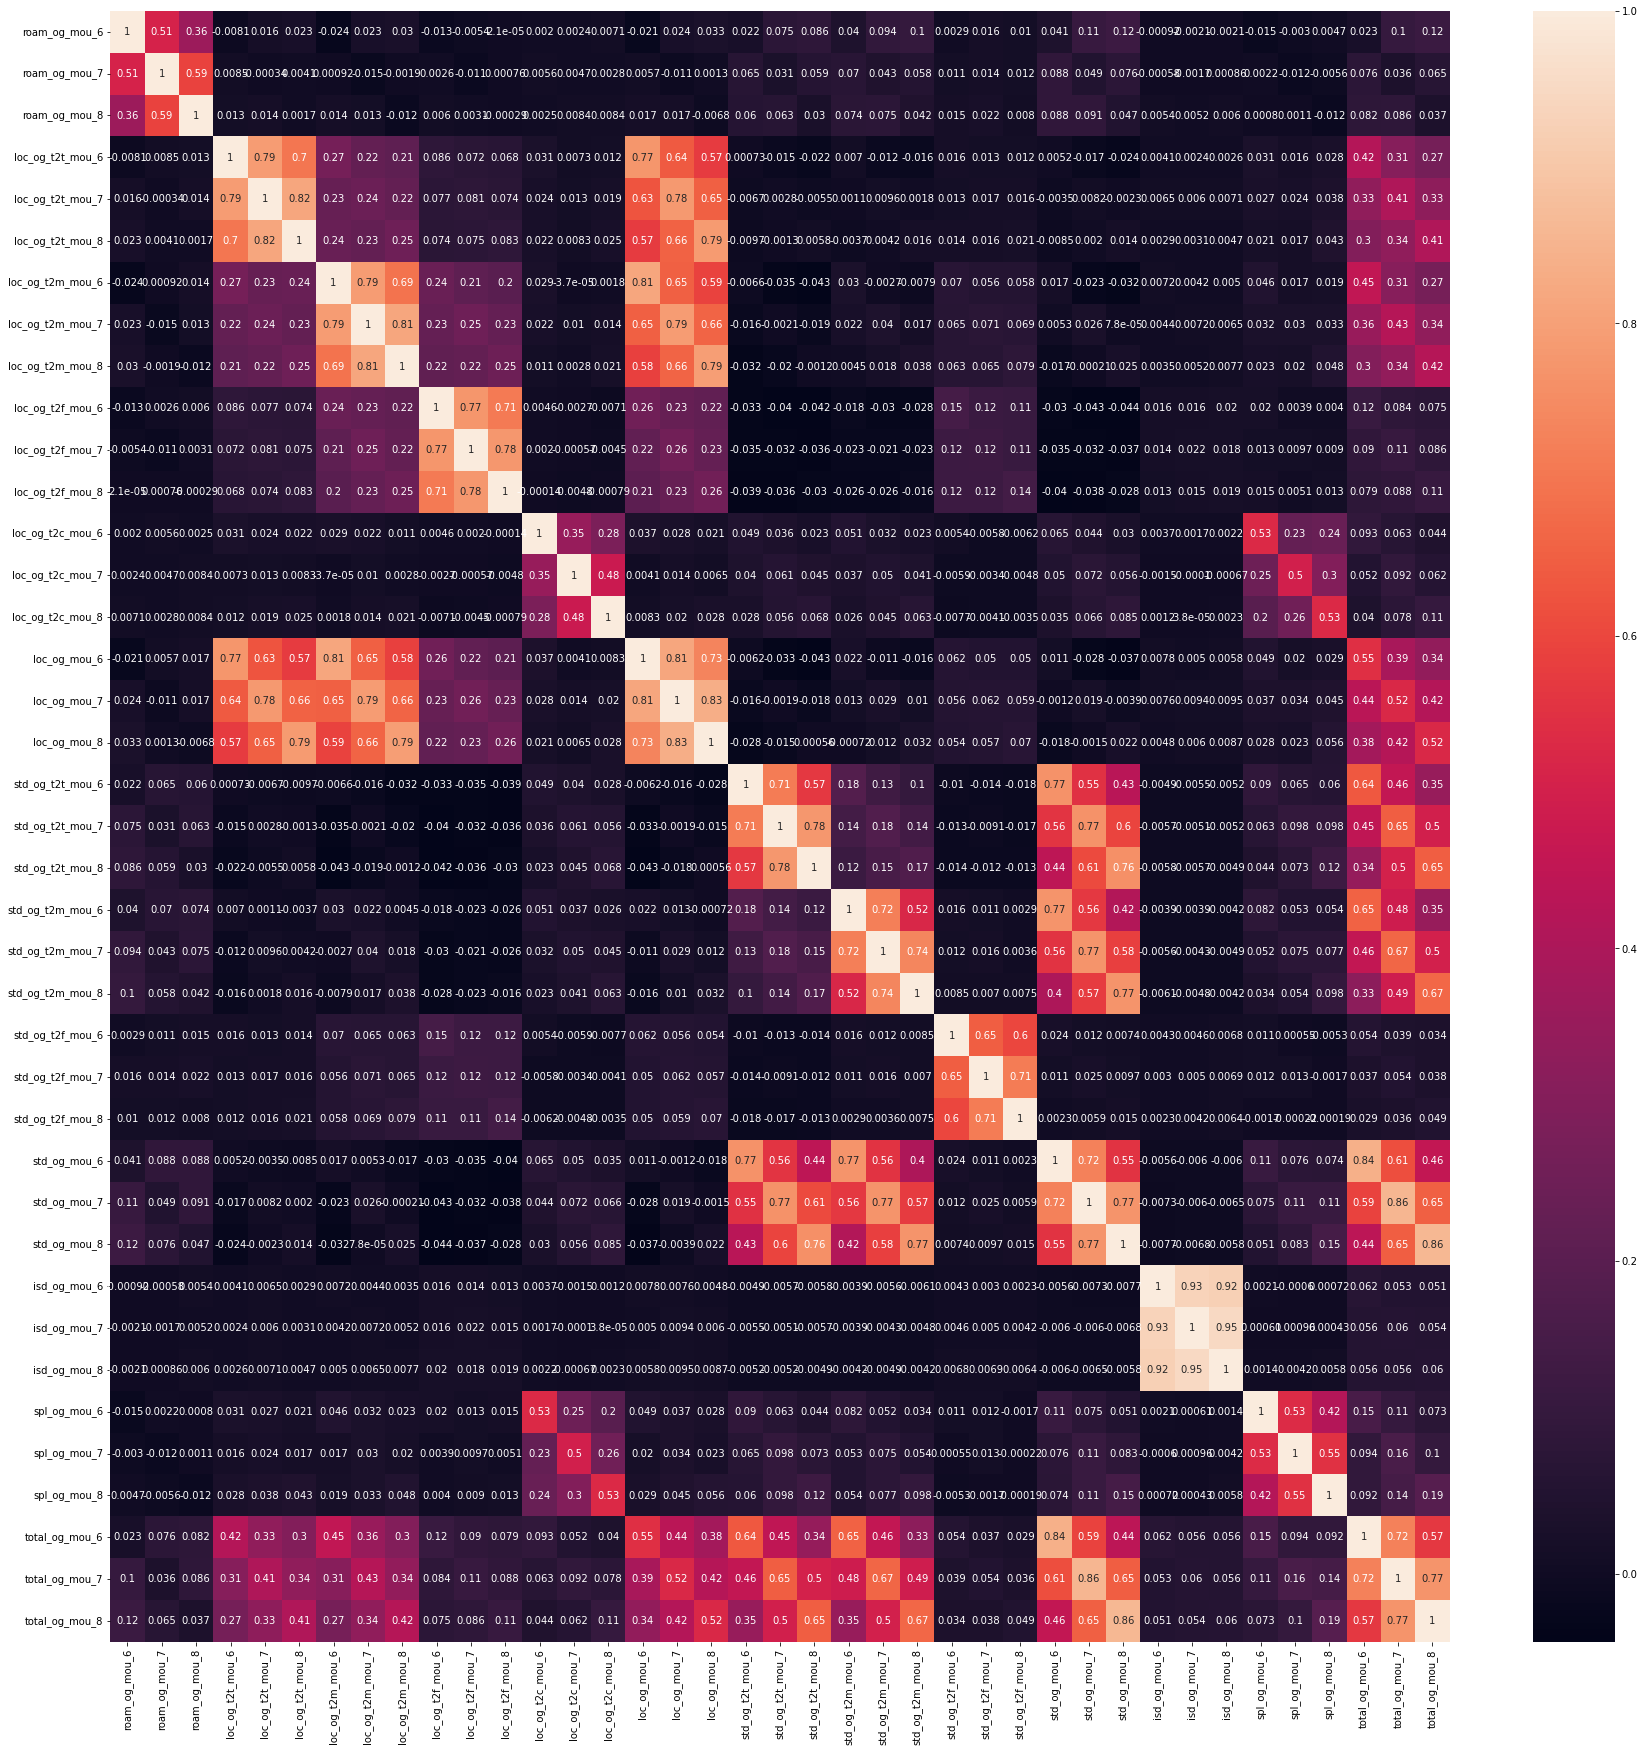

In [43]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(og_mou_df.corr(), annot = True)
plt.show()

Total outgoing minutes of usage is almost entirely explained by the Std calls usage and not a lot by the Local calls
Total Outgoing minutes of usage of month 8 is also correlated to the month 7. Indicating that if a customer has High MOU in month 7 then they will continue to have High MOU in month 8
The STD Outgoing MOU is highly correlated to the T2T Minutes of Usage
High Correlation between OutGoing T2T Usage for Months 6 and 7 and Months 7 and 8

In [44]:
g3_df = df_train.filter(regex='3g')
print(g3_df.columns)

Index(['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')


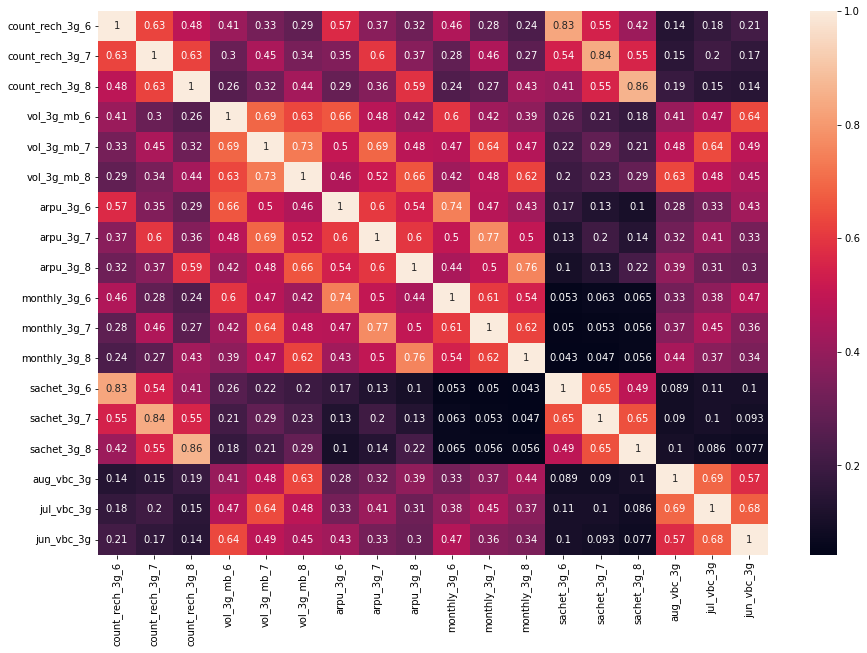

In [45]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(g3_df.corr(), annot = True)
plt.show()

count_rech_3g

In [46]:
g2_df = df_train.filter(regex='2g')
print(g2_df.columns)

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8'],
      dtype='object')


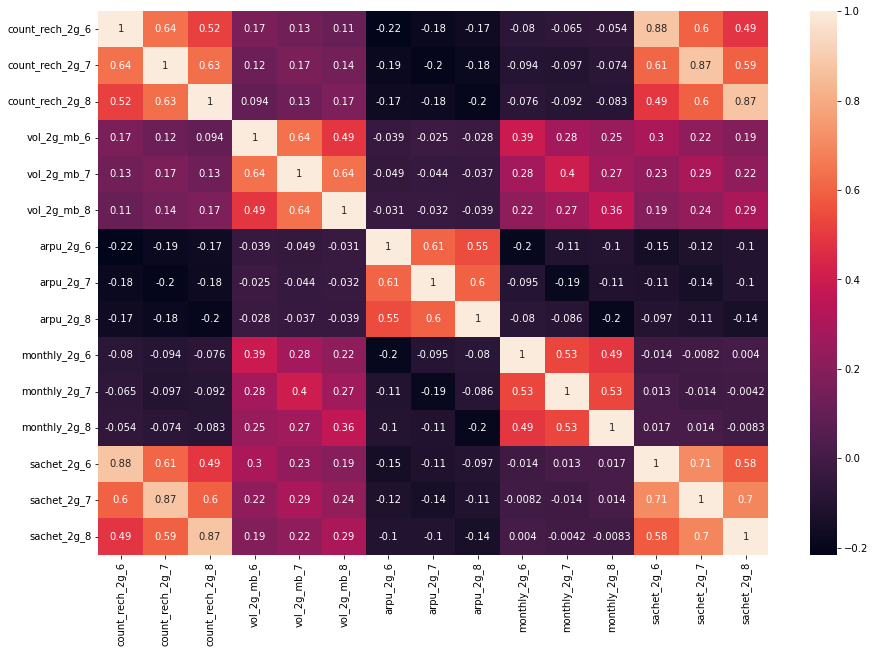

In [47]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(g2_df.corr(), annot = True)
plt.show()

<AxesSubplot:xlabel='churn_probability', ylabel='vol_3g_mb_8'>

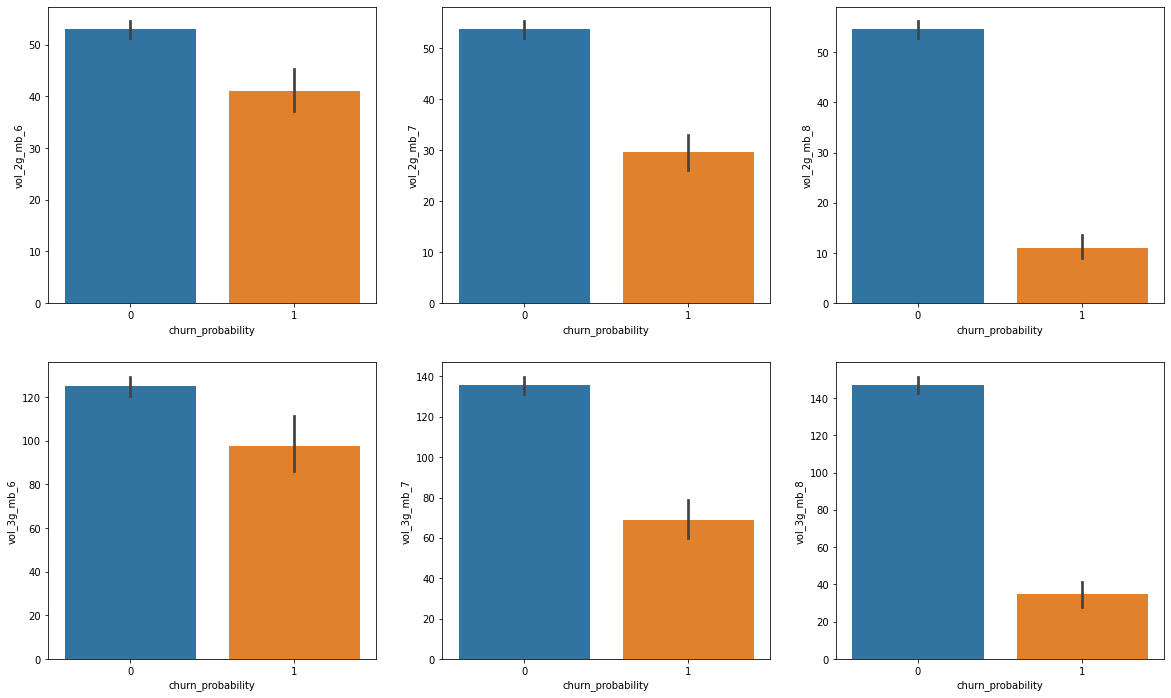

In [48]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn_probability', y = 'vol_2g_mb_6', data = df_train)
plt.subplot(2,3,2)
sns.barplot(x = 'churn_probability', y = 'vol_2g_mb_7', data = df_train)
plt.subplot(2,3,3)
sns.barplot(x = 'churn_probability', y = 'vol_2g_mb_8', data = df_train)
plt.subplot(2,3,4)
sns.barplot(x = 'churn_probability', y = 'vol_3g_mb_6', data = df_train)
plt.subplot(2,3,5)
sns.barplot(x = 'churn_probability', y = 'vol_3g_mb_7', data = df_train)
plt.subplot(2,3,6)
sns.barplot(x = 'churn_probability', y = 'vol_3g_mb_8', data = df_train)

In [49]:
rech_df = df_train.filter(regex = 'rech')
print(rech_df.columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')


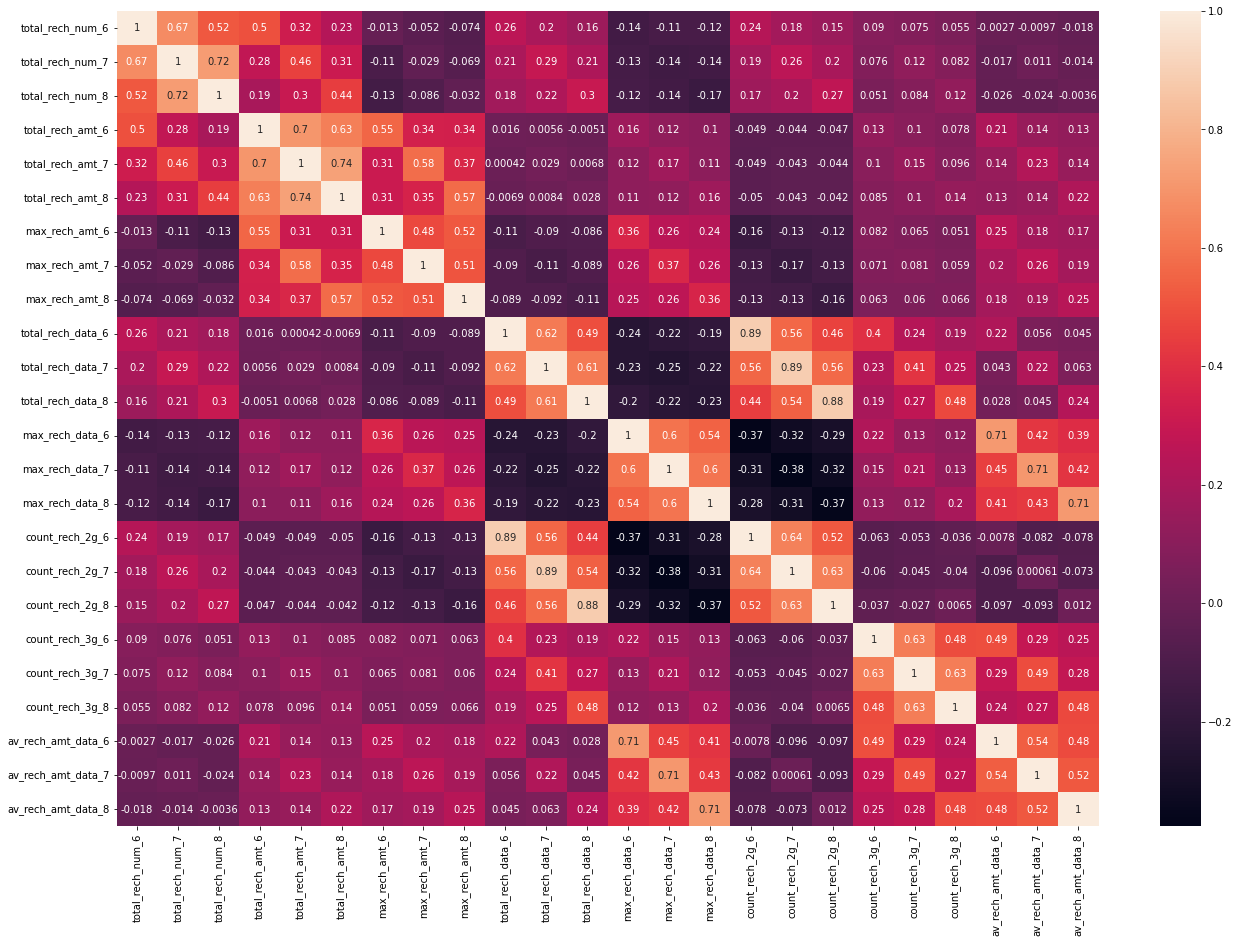

In [50]:
fig = plt.figure(figsize=(22, 15))
sns.heatmap(rech_df.corr(), annot = True)
plt.show()

High correlation between Average Recharge Amount and Rechage amounts for 6 and 7
This is expected as the recharge amount is calculated for purpose of filtering high value customers
There is high correlation 80% between data recharge for month 7 and recharge for month 8.
Any factor that has correlation with month 8 is probably correlated to the churn prediction

count recharge have high correlation

In [51]:
total_df = df_train.filter(regex = 'total')
total_df.columns

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8'],
      dtype='object')

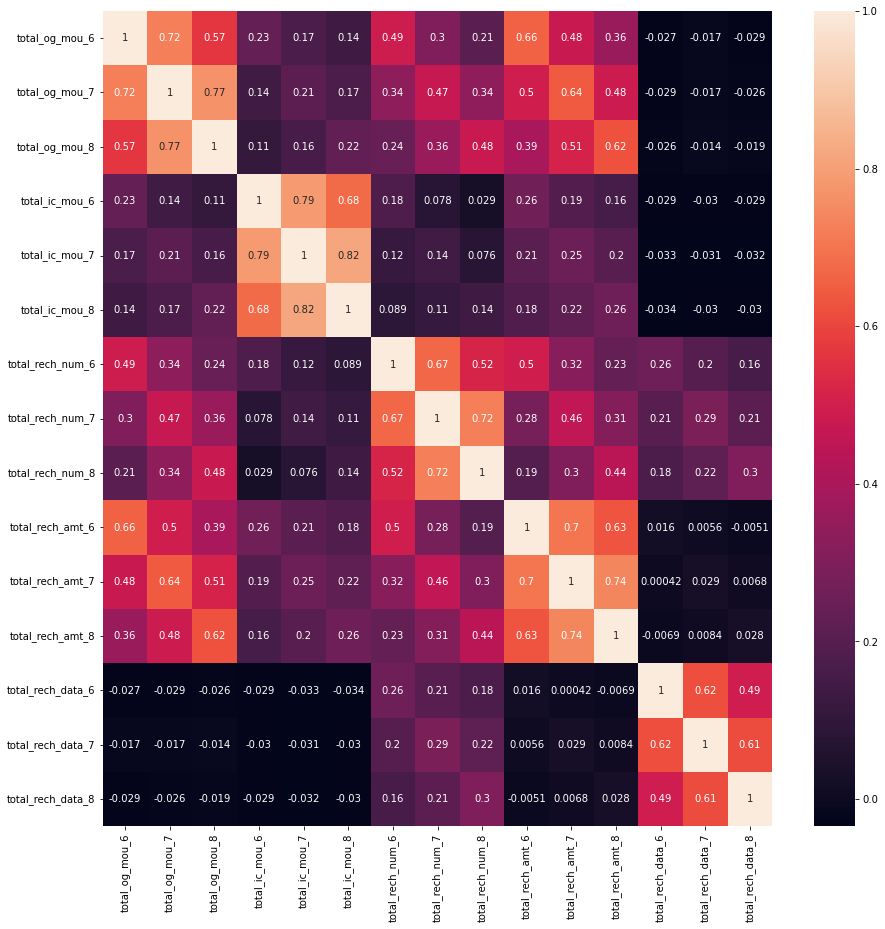

In [52]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(total_df.corr(), annot = True)
plt.show()

total_og_mou high corr

There is greater than 70% and some cases 82% correlation between months 7 and 8 regarding Incoming & Outgoing minutes of usage
This is probabaly due to the fact that if there is heavy usage in month 7 then subsequently in month 8 there is also heavy usage - The cusotmer will not churn if there is heavy usage and vice versa

In [53]:
amt_df = df_train.filter(regex='amt')
print(amt_df.columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')


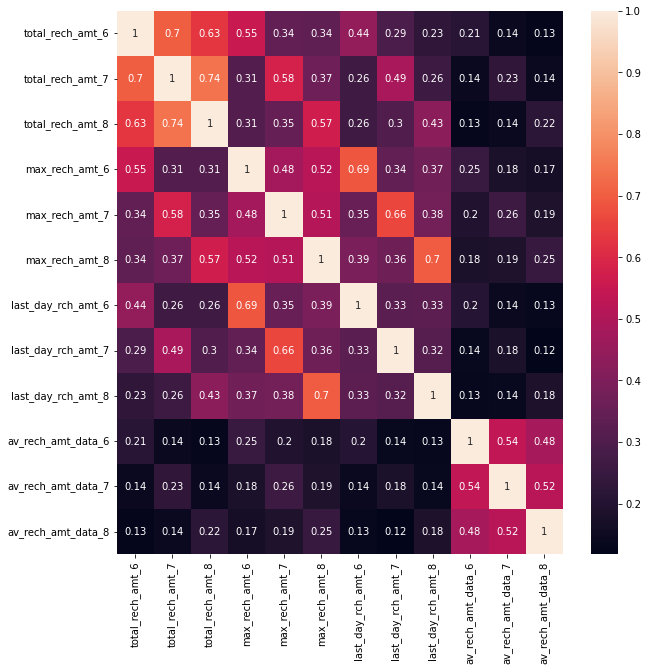

In [54]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(amt_df.corr(), annot = True)
plt.show()

Some of this correlation is the same as the First Recharge Amount correlation
There is also higher correlation between the Max Recharge Amount in month 8 (Bad Phase) and the Last Day Recharge Amount
This could indicate that if a customer is not going to Churn then they Recharge for a higher amount in month 8

last day rech amt

In [55]:
ic_mou_df = df_train.filter(regex='ic.*mou')
print(ic_mou_df.columns)

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8'],
      dtype='object')


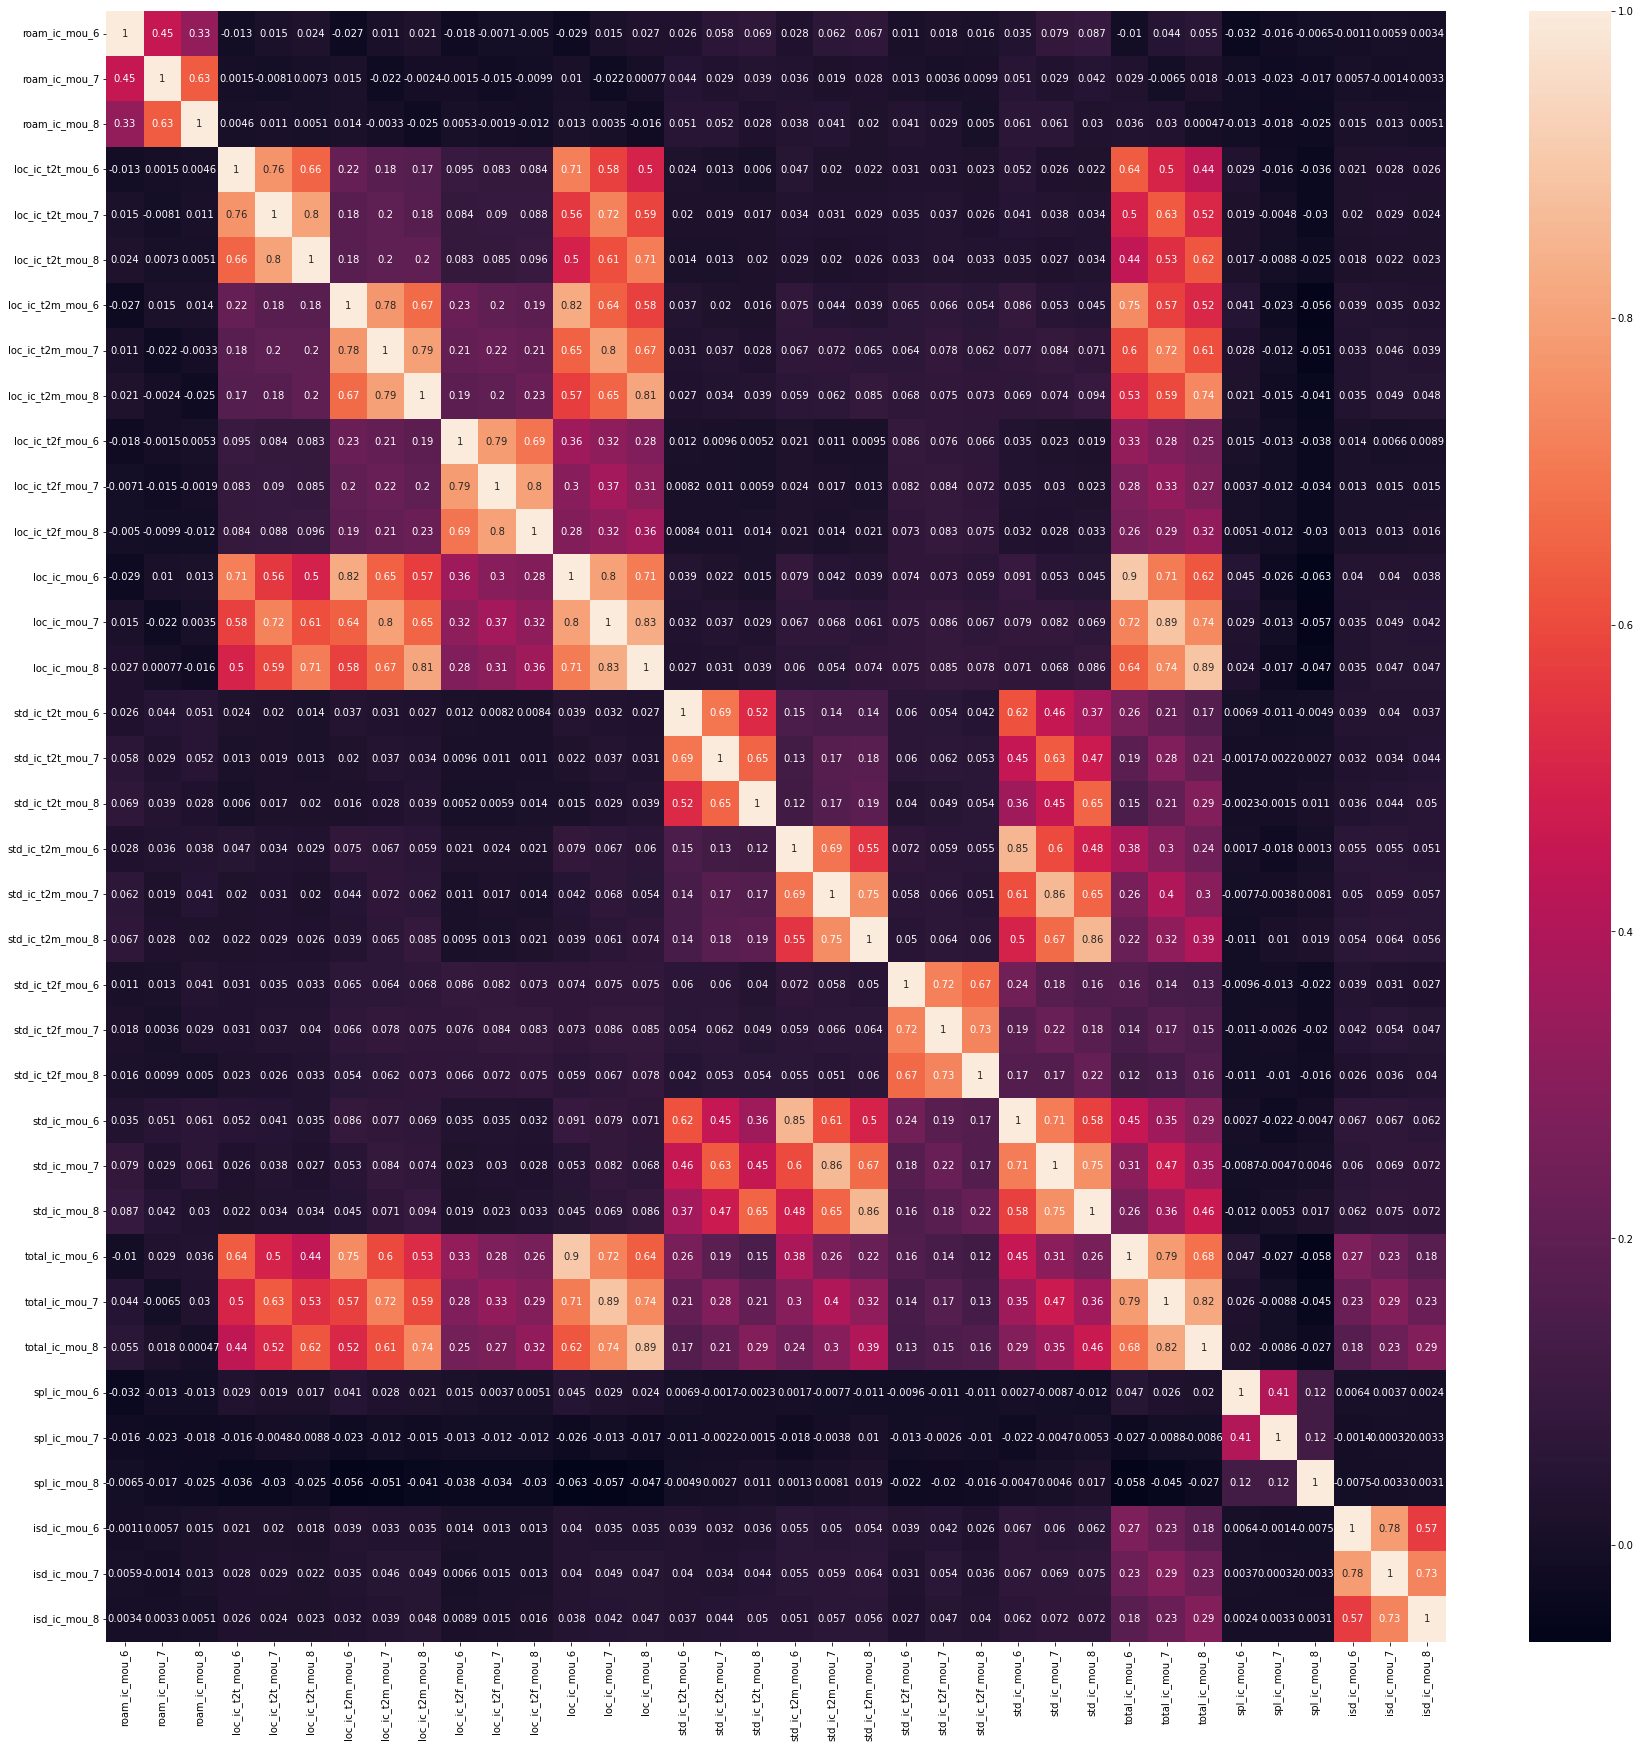

In [56]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(ic_mou_df.corr(), annot = True)
plt.show()

local_ic_t2m_mou,local_ic_mou, std_ic_t2m_mou

Total Incoming minutes of usage is almost entirely explained by the LOCAL call usage and not a lot by the STD calls
Total Incoming minutes of usage of month 8 is also correlated to the month 7. Indicating that if a customer has High MOU in month 7 then they will continue to have High MOU in month 8
The STD Incoming MOU is fully explained by the T2M Minutes of Usage
High Correlation between Incoming T2T Usage for Months 6 and 7 and Months 7 and 8

In [57]:
og_mou_df = df_train.filter(regex='og.*mou')
print(og_mou_df.columns)

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')


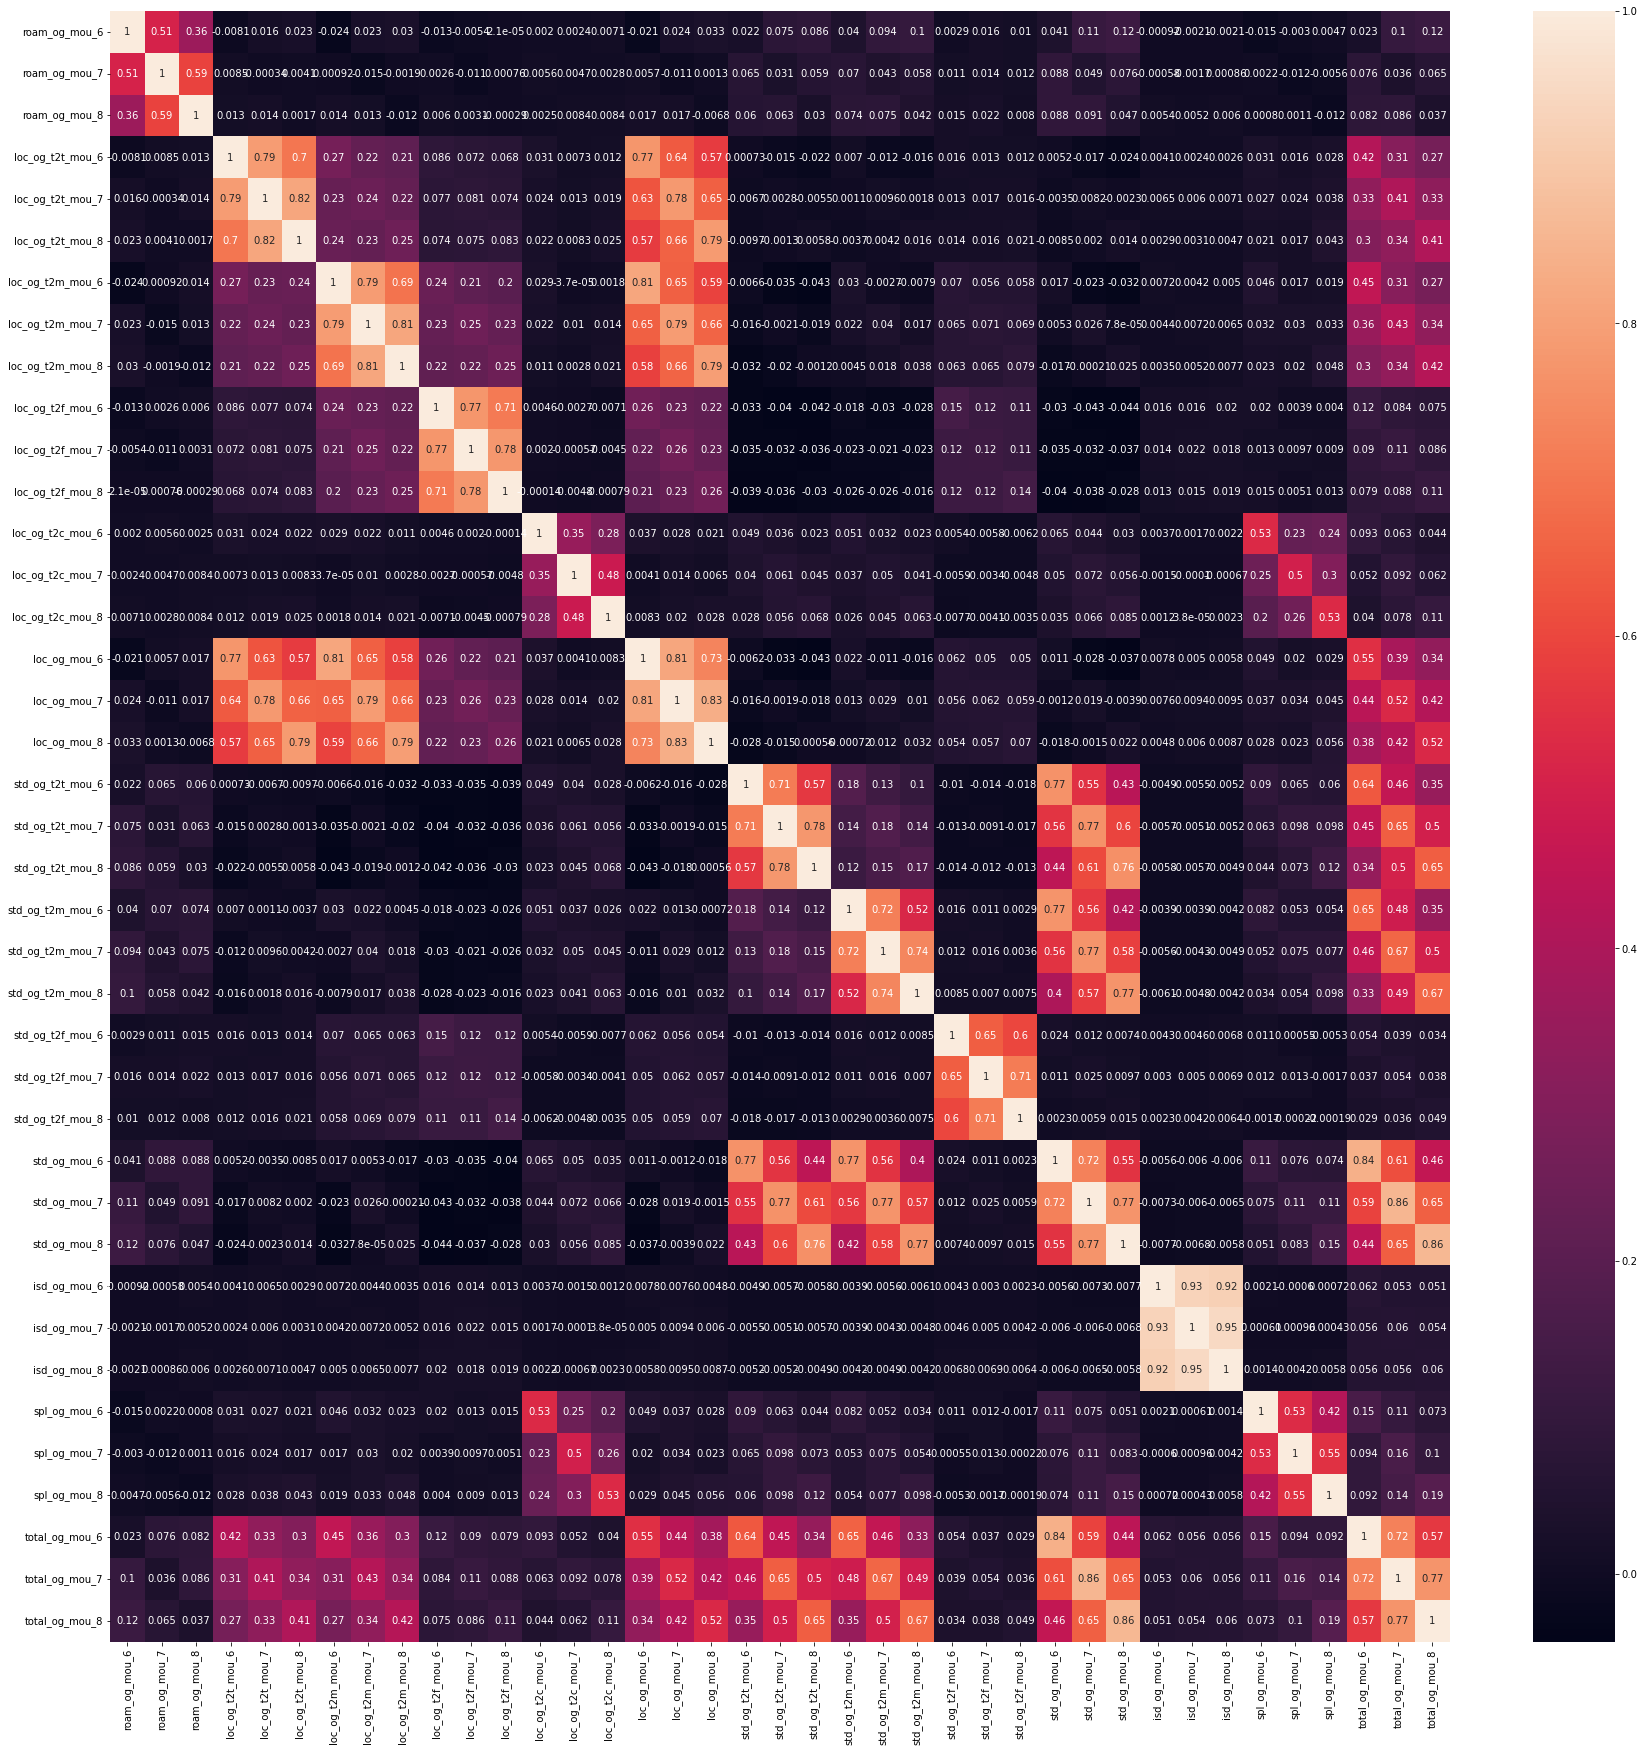

In [58]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(og_mou_df.corr(), annot = True)
plt.show()

Total outgoing minutes of usage is almost entirely explained by the Std calls usage and not a lot by the Local calls
Total Outgoing minutes of usage of month 8 is also correlated to the month 7. Indicating that if a customer has High MOU in month 7 then they will continue to have High MOU in month 8
The STD Outgoing MOU is highly correlated to the T2T Minutes of Usage
High Correlation between OutGoing T2T Usage for Months 6 and 7 and Months 7 and 8

In [59]:
g3_df = df_train.filter(regex='3g')
print(g3_df.columns)

Index(['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')


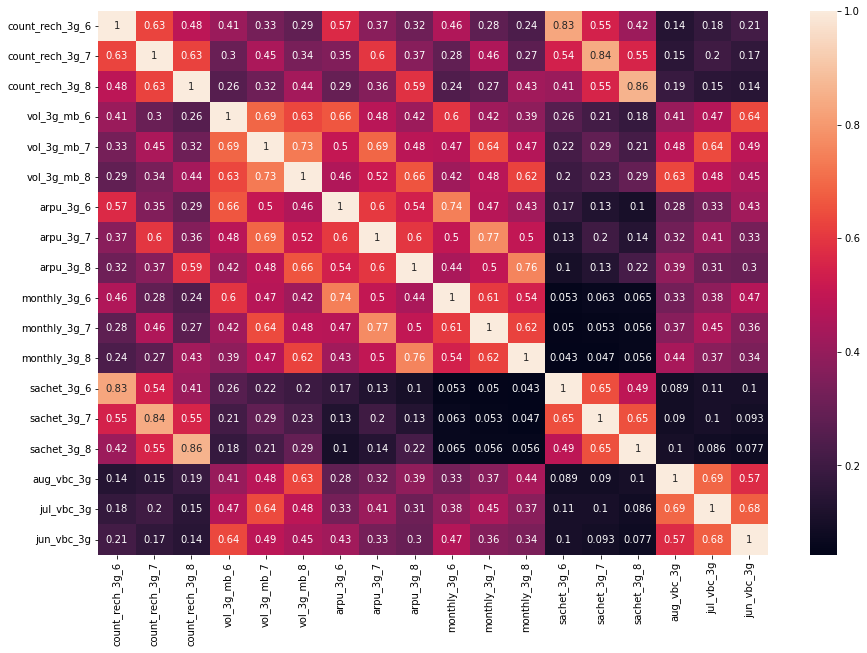

In [60]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(g3_df.corr(), annot = True)
plt.show()

count_rech_3g

In [61]:
g2_df = df_train.filter(regex='2g')
print(g2_df.columns)

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8'],
      dtype='object')


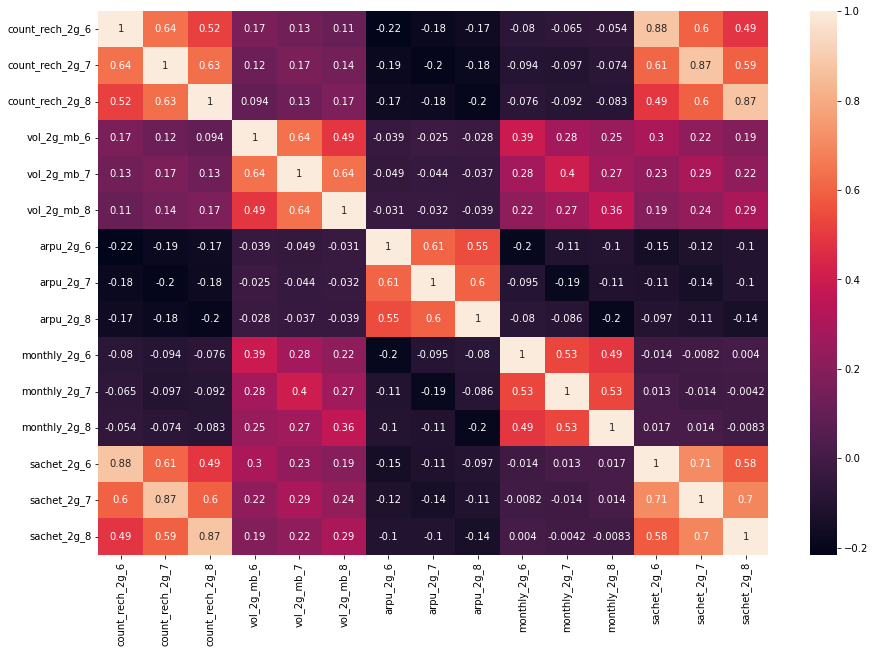

In [62]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(g2_df.corr(), annot = True)
plt.show()

In [63]:
def avgCol(df):
    df['avg_arpu_67'] = round(
        (df.arpu_6 + df.arpu_7) / 2, 2)
    df['avg_onnet_mou_67'] = round(
        (df.onnet_mou_7 + df.onnet_mou_6) / 2, 2)
    df['avg_offnet_mou_67'] = round(
        (df.offnet_mou_7 + df.offnet_mou_6) / 2, 2)
    df['avg_roam_ic_mou_67'] = round(
        (df.roam_ic_mou_6 + df.roam_ic_mou_7) / 2, 2)
    df['avg_roam_og_mou_67'] = round((
        df.roam_og_mou_6 + df.roam_og_mou_7) / 2, 2)
    df['avg_loc_og_t2t_mou_67'] = round(
        (df.loc_og_t2t_mou_6 + df.loc_og_t2t_mou_7) / 2, 2)
    df['avg_loc_og_t2m_mou_67'] = round(
        (df.loc_og_t2m_mou_6 + df.loc_og_t2m_mou_7) / 2, 2)
    df['avg_loc_og_t2f_mou_67'] = round(
        (df.loc_og_t2f_mou_6 + df.loc_og_t2f_mou_7) / 2, 2)
    df['avg_loc_og_t2c_mou_67'] = round(
        (df.loc_og_t2c_mou_6 + df.loc_og_t2c_mou_7) / 2, 2)
    df['avg_loc_og_mou_67'] = round(
        (df.loc_og_mou_6 + df.loc_og_mou_7) / 2, 2)
    df['avg_std_og_t2t_mou_67'] = round(
        (df.std_og_t2t_mou_6 + df.std_og_t2t_mou_7) / 2, 2)
    df['avg_std_og_t2m_mou_67'] = round(
        (df.std_og_t2m_mou_6 + df.std_og_t2m_mou_7) / 2, 2)
    df['avg_std_og_t2f_mou_67'] = round(
        (df.std_og_t2f_mou_6 + df.std_og_t2f_mou_7) / 2, 2)
    df['avg_std_og_mou_67'] = round(
        (df.std_og_mou_6 + df.std_og_mou_7) / 2, 2)
    df['avg_isd_og_mou_67'] = round(
        (df.isd_og_mou_6 + df.isd_og_mou_7) / 2, 2)
    df['avg_spl_og_mou_67'] = round(
        (df.spl_og_mou_6 + df.spl_og_mou_7) / 2, 2)
    df['avg_og_others_67'] = round(
        (df.og_others_6 + df.og_others_7) / 2, 2)
    df['avg_total_og_mou_67'] = round(
        (df.total_og_mou_6 + df.total_og_mou_7) / 2, 2)
    df['avg_loc_ic_t2t_mou_67'] = round(
        (df.loc_ic_t2t_mou_6 + df.loc_ic_t2t_mou_7) / 2, 2)
    df['avg_loc_ic_t2m_mou_67'] = round(
        (df.loc_ic_t2m_mou_6 + df.loc_ic_t2m_mou_7) / 2, 2)
    df['avg_loc_ic_t2f_mou_67'] = round(
        (df.loc_ic_t2f_mou_6 + df.loc_ic_t2f_mou_7) / 2, 2)
    df['avg_loc_ic_mou_67'] = round(
        (df.loc_ic_mou_6 + df.loc_ic_mou_7) / 2, 2)
    df['avg_std_ic_t2m_mou_67'] = round(
        (df.std_ic_t2m_mou_6 + df.std_ic_t2m_mou_7) / 2, 2)
    df['avg_std_ic_t2t_mou_67'] = round(
        (df.std_ic_t2t_mou_6 + df.std_ic_t2t_mou_7) / 2, 2)
    df['avg_std_ic_t2f_mou_67'] = round(
        (df.std_ic_t2f_mou_6 + df.std_ic_t2f_mou_7) / 2, 2)
    df['avg_std_ic_mou_67'] = round(
        (df.std_ic_mou_6 + df.std_ic_mou_7) / 2, 2)
    df['avg_total_ic_mou_67'] = round(
        (df.total_ic_mou_6 + df.total_ic_mou_7) / 2, 2)
    df['avg_spl_ic_mou_67'] = round(
        (df.spl_ic_mou_6 + df.spl_ic_mou_7) / 2, 2)
    df['avg_isd_ic_mou_67'] = round(
        (df.isd_ic_mou_6 + df.isd_ic_mou_7) / 2, 2)
    df['avg_ic_others_67'] = round(
        (df.ic_others_6 + df.ic_others_7) / 2, 2)
    df['avg_total_rech_num_67'] = round(
        (df.total_rech_num_6 + df.total_rech_num_7) / 2, 2)
    df['avg_total_rech_amt_67'] = round(
        (df.total_rech_amt_6 + df.total_rech_amt_7) / 2, 2)
    df['avg_max_rech_amt_67'] = round(
        (df.max_rech_amt_6 + df.max_rech_amt_7) / 2, 2)
    df['avg_last_day_rch_amt_67'] = round(
        (df.last_day_rch_amt_6 + df.last_day_rch_amt_7) / 2, 2)
    df['avg_total_rech_data_67'] = round(
        (df.total_rech_data_6 + df.total_rech_data_7) / 2, 2)
    df['avg_max_rech_data_67'] = round(
        (df.max_rech_data_6 + df.max_rech_data_7) / 2, 2)
    df['avg_count_rech_2g_67'] = round(
        (df.count_rech_2g_6 + df.count_rech_2g_7) / 2, 2)
    df['avg_count_rech_3g_67'] = round(
        (df.count_rech_3g_6 + df.count_rech_3g_7) / 2, 2)
    df['avg_av_rech_amt_data_67'] = round(
        (df.av_rech_amt_data_6 + df.av_rech_amt_data_7) / 2, 2)
    df['avg_vol_2g_mb_67'] = round(
        (df.vol_2g_mb_6 + df.vol_2g_mb_7) / 2, 2)
    df['avg_vol_3g_mb_67'] = round(
        (df.vol_3g_mb_6 + df.vol_3g_mb_7) / 2, 2)
    df['avg_arpu_3g_67'] = round(
        (df.arpu_3g_6 + df.arpu_3g_7) / 2, 2)
    df['avg_arpu_2g_67'] = round(
        (df.arpu_2g_6 + df.arpu_2g_7) / 2, 2)
    df['avg_night_pck_user_67'] = round(
        (df.night_pck_user_6 + df.night_pck_user_7) / 2, 2)
    df['avg_monthly_2g_67'] = round(
        (df.monthly_2g_6 + df.monthly_2g_7) / 2, 2)
    df['avg_sachet_2g_67'] = round(
        (df.sachet_2g_6 + df.sachet_2g_7) / 2, 2)
    df['avg_monthly_3g_67'] = round(
        (df.monthly_3g_6 + df.monthly_3g_7) / 2, 2)
    df['avg_sachet_3g_67'] = round(
        (df.sachet_3g_6 + df.sachet_3g_7) / 2, 2)
    df['avg_monthly_2g_67'] = round(
        (df.monthly_2g_6 + df.monthly_2g_7) / 2, 2)
    df['avg_vbc_67'] = round(
        (df.jun_vbc_3g + df.jul_vbc_3g) / 2, 2)


col_to_drop = [
    'arpu_6',
    'onnet_mou_6',
    'offnet_mou_6',
    'roam_ic_mou_6',
    'roam_og_mou_6',
    'loc_og_t2t_mou_6',
    'loc_og_t2m_mou_6',
    'loc_og_t2f_mou_6',
    'loc_og_t2c_mou_6',
    'loc_og_mou_6',
    'std_og_t2t_mou_6',
    'std_og_t2m_mou_6',
    'std_og_t2f_mou_6',
    'std_og_mou_6',
    'isd_og_mou_6',
    'spl_og_mou_6',
    'og_others_6',
    'total_og_mou_6',
    'loc_ic_t2t_mou_6',
    'loc_ic_t2m_mou_6',
    'loc_ic_t2f_mou_6',
    'loc_ic_mou_6',
    'std_ic_t2m_mou_6',
    'std_ic_t2t_mou_6',
    'std_ic_t2f_mou_6',
    'std_ic_mou_6',
    'total_ic_mou_6',
    'spl_ic_mou_6',
    'isd_ic_mou_6',
    'ic_others_6',
    'total_rech_num_6',
    'total_rech_amt_6',
    'max_rech_amt_6',
    'last_day_rch_amt_6',
    'total_rech_data_6',
    'max_rech_data_6',
    'count_rech_2g_6',
    'count_rech_3g_6',
    'av_rech_amt_data_6',
    'vol_2g_mb_6',
    'vol_3g_mb_6',
    'arpu_3g_6',
    'arpu_2g_6',
    'night_pck_user_6',
    'monthly_2g_6',
    'sachet_2g_6',
    'monthly_3g_6',
    'sachet_3g_6',
    'monthly_2g_6',

    'jun_vbc_3g',

    'arpu_7',
    'onnet_mou_7',
    'offnet_mou_7',
    'roam_ic_mou_7',
    'roam_og_mou_7',
    'loc_og_t2t_mou_7',
    'loc_og_t2m_mou_7',
    'loc_og_t2f_mou_7',
    'loc_og_t2c_mou_7',
    'loc_og_mou_7',
    'std_og_t2t_mou_7',
    'std_og_t2m_mou_7',
    'std_og_t2f_mou_7',
    'std_og_mou_7',
    'isd_og_mou_7',
    'spl_og_mou_7',
    'og_others_7',
    'total_og_mou_7',
    'loc_ic_t2t_mou_7',
    'loc_ic_t2m_mou_7',
    'loc_ic_t2f_mou_7',
    'loc_ic_mou_7',
    'std_ic_t2m_mou_7',
    'std_ic_t2t_mou_7',
    'std_ic_t2f_mou_7',
    'std_ic_mou_7',
    'total_ic_mou_7',
    'spl_ic_mou_7',
    'isd_ic_mou_7',
    'ic_others_7',
    'total_rech_num_7',
    'total_rech_amt_7',
    'max_rech_amt_7',
    'last_day_rch_amt_7',
    'total_rech_data_7',
    'max_rech_data_7',
    'count_rech_2g_7',
    'count_rech_3g_7',
    'av_rech_amt_data_7',
    'vol_2g_mb_7',
    'vol_3g_mb_7',
    'arpu_3g_7',
    'arpu_2g_7',
    'night_pck_user_7',
    'monthly_2g_7',
    'sachet_2g_7',
    'monthly_3g_7',
    'sachet_3g_7',
    'monthly_2g_7',
    'jul_vbc_3g',
]

avgCol(df_train)
avgCol(df_test)
df_train.drop(columns=col_to_drop, inplace=True)
df_test.drop(columns=col_to_drop, inplace=True)
df_train.shape,df_test.shape


((69999, 106), (30000, 105))

In [64]:
df_train = df_train.astype('float64')
df_test = df_test.astype('float64') 

### Model Building

In [65]:
#Importing the Model building libraries 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [66]:
# df_train,df_test = train_test_split(df,train_size=0.9,random_state=100)
scaler = StandardScaler()
scaling_lst = df_train.columns.values.tolist()
scaling_lst.remove('churn_probability')
df_train[scaling_lst] = scaler.fit_transform(df_train[scaling_lst])
df_test[df_test.columns]  = scaler.transform(df_test[df_test.columns] )
y_train = df_train.pop('churn_probability')
X_train = df_train
 

In [ ]:
# params = {
#     'learning_rate': [0.08,0.1,0.15,10],
#     'n_estimators' : [250,500],
#     'min_samples_split' : [10,15,20],
#     'max_depth' : [5,6,8],
#     'max_features' : [20,30,40,60],
# }
# gbm = GradientBoostingClassifier()
# gridSearch = GridSearchCV(gbm,param_grid=params,n_jobs=-2,verbose=2)
# gridSearch.fit(X_train,y_train)
# y_train_pred = gridSearch.predict(X_train)
# print(accuracy_score(y_train,y_train_pred))
# y_test_pred = gridSearch.predict(X_test)
# print(accuracy_score(y_test,y_test_pred))

In [68]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lg = LogisticRegression(solver='newton-cg', )    
# #Setting the range for class weights
# weights = np.linspace(0.0,0.99,200)
# #Creating a dictionary grid for grid search
param_grid = {'class_weight':[{0: 0.20396984924623116, 1: 0.7960301507537688}]}
#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lg, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

### BEST ESTIMATOR IS 
# gridsearch = LogisticRegression(class_weight={0: 0.20396984924623116, 1: 0.7960301507537688},
#                    solver='newton-cg')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [69]:
from sklearn.metrics import confusion_matrix,f1_score,precision_recall_curve,precision_score
def evaluateModel(y_test, pred_test):    
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
    print('accuracy score for train set is',accuracy_score(y_test,pred_test))
    print('f1 score for train set is',f1_score(y_test,pred_test))
    print('precision score for train set is',precision_score(y_test,pred_test))
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
     


accuracy score for train set is 0.9167130959013701
f1 score for train set is 0.6221646143875568
precision score for train set is 0.5784526391901663


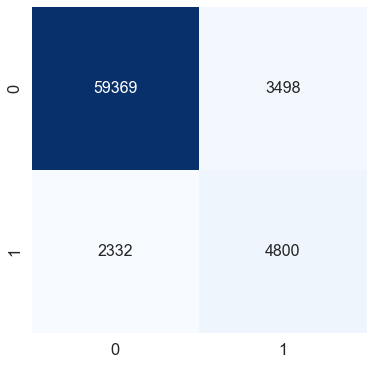

In [71]:
y_train_pred = gridsearch.predict(X_train)
evaluateModel(y_train,y_train_pred)

In [94]:
y_test_pred = gridsearch.predict(df_test)
df_res = pd.DataFrame({
    'id' : df_test.index,
    'churn_probability':y_test_pred.astype('int64')
})
df_res.to_csv('submission.csv',index=False)

#### Important Features 

In [76]:
pd.DataFrame(gridsearch.cv_results_)

mean_fit_time         std_fit_time      mean_score_time  \
0                 9.18                 0.35                 0.01   

        std_score_time                               param_class_weight  \
0                 0.00  {0: 0.20396984924623116, 1: 0.7960301507537688}   

                                              params    split0_test_score  \
0  {'class_weight': {0: 0.20396984924623116, 1: 0...                 0.62   

     split1_test_score    split2_test_score    split3_test_score  \
0                 0.62                 0.61                 0.62   

     split4_test_score      mean_test_score       std_test_score  \
0                 0.62                 0.62                 0.00   

   rank_test_score  
0                1

In [90]:
# Selecting top 60 features using RFE
from sklearn.feature_selection import RFE
rfe = RFE(estimator = LogisticRegression(class_weight={0: 0.20396984924623116, 1: 0.7960301507537688}), n_features_to_select = 60)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(class_weight={0: 0.20396984924623116,
                                               1: 0.7960301507537688}),
    n_features_to_select=60)

accuracy score for train set is 0.9172559607994399
f1 score for train set is 0.6234559875178779
precision score for train set is 0.5812121212121212


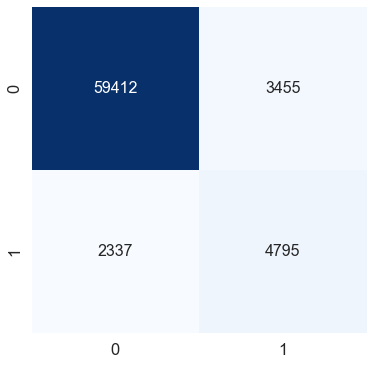

In [92]:
# list(zip(X_train.columns, rfe.support_, rfe.ranking_))
evaluateModel(y_train,rfe.predict(X_train))

### Most Important Features

In [112]:
results = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train.columns.values))

In [116]:
for num3, i in enumerate(results, start=0):
            if num3 < 15:
                print( i)

(1, 'aon')
(1, 'arpu_2g_8')
(1, 'arpu_3g_8')
(1, 'arpu_8')
(1, 'aug_vbc_3g')
(1, 'av_rech_amt_data_8')
(1, 'avg_arpu_67')
(1, 'avg_offnet_mou_67')
(1, 'avg_onnet_mou_67')
(1, 'avg_roam_ic_mou_67')
(1, 'count_rech_2g_8')
(1, 'count_rech_3g_8')
(1, 'date_of_last_rech_6')
(1, 'date_of_last_rech_7')
(1, 'date_of_last_rech_8')


# Scores in Train and Hidden Test set is : 

- train set : 0.91725
- test set (hidden) : 0.91700